<a href="https://colab.research.google.com/github/Pkolekar940/Bike-sharing-Demand-Prediction/blob/main/Bike_sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike sharing Demand Sharing 



# **Project Summary -**

###There are rental bikes in cities to make it easier for people to get around. It's important to have enough bikes available when people need them, so they don't have to wait. But figuring out how many bikes are needed at different times is a challenge. We need to predict how many bikes will be needed each hour to make sure there are always enough for everyone.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#  Let's Loading Dataset and Importing Modules

In [1]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')



# **GitHub Link -**

https://bit.ly/3J0xHxS

# **Problem Statement**


In [2]:
# Let's import our dataset 
import pandas as pd

url = 'https://drive.google.com/file/d/1dZ7p614gC_iwxHwcj-1N0Lc155AGMTJS/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

data = pd.read_csv(url, encoding='latin1')


# **Understand More About The Data**

In [3]:
# Let's View the data of random rows to take a glimps of the data
data.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6965,17/09/2018,246,5,19.4,84,1.6,1252,16.6,0.00,0.0,0.0,Autumn,No Holiday,Yes
8710,28/11/2018,804,22,3.2,34,1.3,1787,-11.1,0.00,0.0,0.0,Autumn,No Holiday,Yes
4605,10/06/2018,2026,21,22.1,55,1.5,2000,12.6,0.00,0.0,0.0,Summer,No Holiday,Yes
3753,06/05/2018,12,9,15.4,97,0.8,413,14.9,0.18,1.0,0.0,Spring,No Holiday,Yes
3046,06/04/2018,499,22,3.9,68,3.0,737,-1.4,0.00,0.0,0.0,Spring,No Holiday,Yes


In [4]:
# Let's check details about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
# Let's generate descriptive statistics of a dataset
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
#Getting the shape of dataset with rows and columns
print(data.shape)

(8760, 14)


##Missing values

In [7]:
#check for count of missing values in each column.
data.isna().sum()
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* ***As we can see above there are no missing value presents thankfully***

##Duplicate values

In [8]:
# let's check is there any ducplicate value present in our data or not
data.duplicated().sum()

0

* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

In [9]:
# Rename the complex columns name
data=data.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [10]:
# creating new dataframe in order to apply some staticle 
num_dat=data[['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall']]

In [11]:
# Let's check the correlation between Rented Bike Count and other features 
data.corr()['Rented_Bike_Count']

Rented_Bike_Count        1.000000
Hour                     0.410257
Temperature              0.538558
Humidity                -0.199780
Wind_speed               0.121108
Visibility               0.199280
Dew_point_temperature    0.379788
Solar_Radiation          0.261837
Rainfall                -0.123074
Snowfall                -0.141804
Name: Rented_Bike_Count, dtype: float64

We can clearly see here Hour, Tempreature, Dew point tempreature and Solar Radiation highly correlated with Rented Bike Count

In [12]:
data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

## Converting to datetime datatype

* ***Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.***





In [13]:
# Let's Converting to datetime datatype
data['Date']=pd.to_datetime(data['Date'])

In [14]:
# Let's extract year from the date module
data['date_year']=data['Date'].dt.year

# Let's extract Months from the date module
data['date_months']=data['Date'].dt.month

# Let's extract Day from the date module
data['date_day']=data['Date'].dt.day_name()


In [15]:
# Let's find value count of date year
data['date_year'].value_counts()

2018    8016
2017     744
Name: date_year, dtype: int64

In [16]:
# Create a new column 'weekdays_weekend' based on 'Date'

data['weekdays_weekend'] = pd.to_datetime(data['Date']).dt.day_name()
data['weekdays_weekend'] = data['weekdays_weekend'].apply(lambda x: 0 if x in ['Saturday', 'Sunday'] else 1 )


In [17]:
# Let's see the value
data['weekdays_weekend'].value_counts()

1    6216
0    2544
Name: weekdays_weekend, dtype: int64

In [18]:
# Let's see random record of our dataset using sample method.
data.sample(5)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,date_year,date_months,date_day,weekdays_weekend
5596,2018-07-22,270,4,25.9,71,0.3,2000,20.2,0.00,0.0,0.0,Summer,No Holiday,Yes,2018,7,Sunday,0
4628,2018-11-06,1280,20,19.1,84,1.7,2000,16.3,0.04,0.0,0.0,Summer,No Holiday,Yes,2018,11,Tuesday,1
783,2018-02-01,295,15,1.5,22,3.0,1998,-17.9,0.76,0.0,0.0,Winter,No Holiday,Yes,2018,2,Thursday,1
1824,2018-02-15,126,0,-0.7,37,3.5,1716,-13.6,0.00,0.0,0.0,Winter,Holiday,Yes,2018,2,Thursday,1
2098,2018-02-26,289,10,1.9,46,1.1,1233,-8.5,1.39,0.0,0.0,Winter,No Holiday,Yes,2018,2,Monday,1


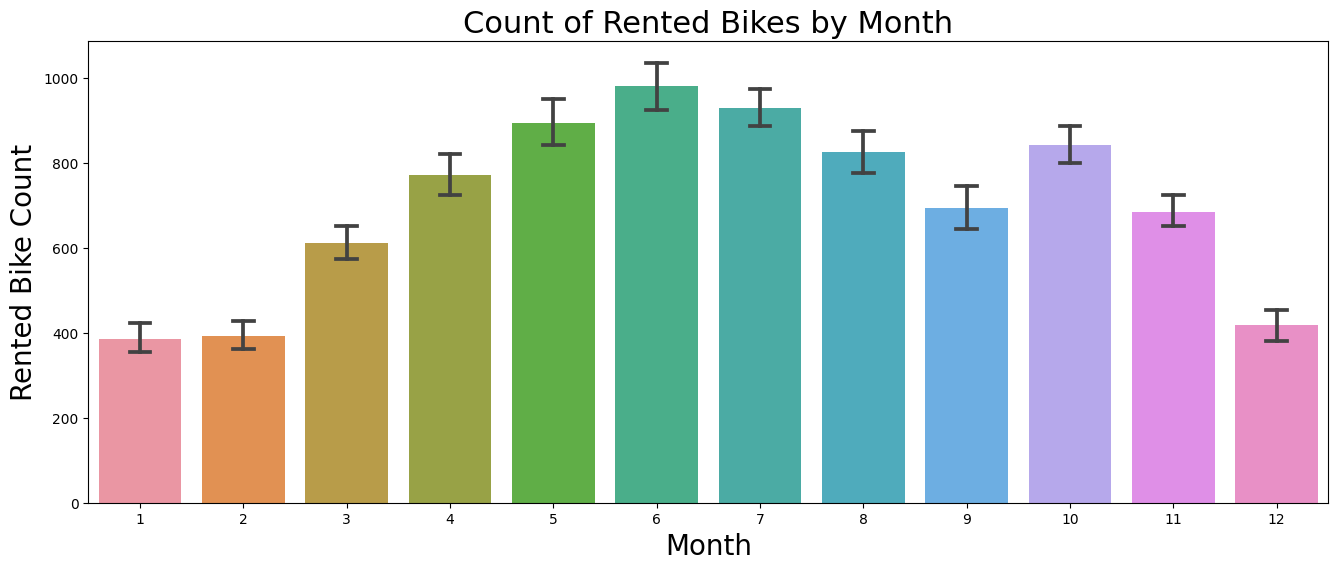

In [19]:
# Let's plot barchart Rented Bike Count VS Months.

fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=data, x='date_months', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set_title('Count of Rented Bikes by Month', fontsize=22)
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Rented Bike Count', fontsize=20)

plt.show()


* From the above bar plot we can clearly say that from  the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.

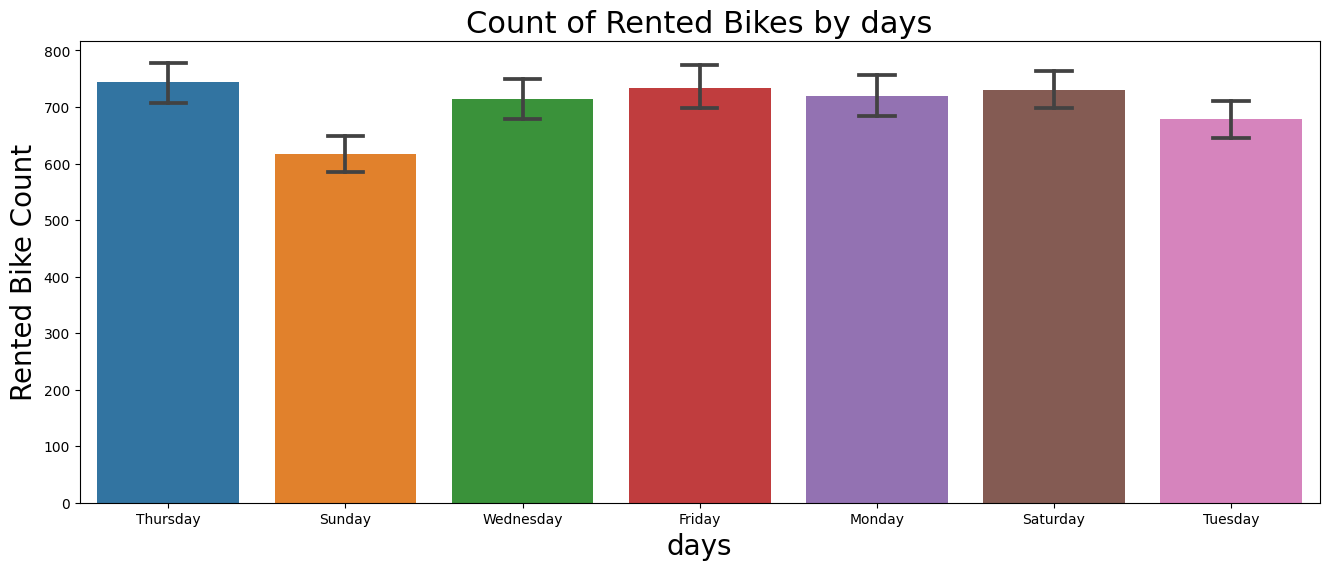

In [20]:
# Let's plot barchart Rented Bike Count VS Days.

fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=data, x='date_day', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set_title('Count of Rented Bikes by days', fontsize=22)
ax.set_xlabel('days', fontsize=20)
ax.set_ylabel('Rented Bike Count', fontsize=20)

plt.show()


[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

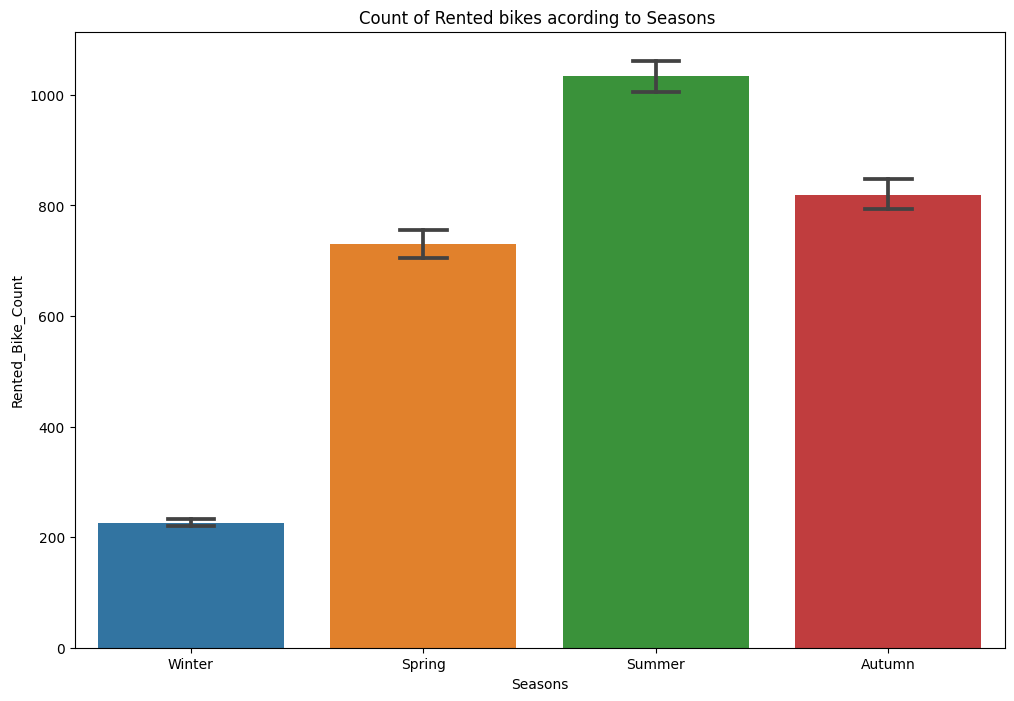

In [21]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,8))
sns.barplot(data=data,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

We can see here in Count of Rented bikes acording to Seasons chart in summer seasons it's more than 1000 rented bikes count

In [22]:
# Let's define the temperature bins
bins = [-20, -10, 0, 10, 20, 30, 40]

# Create a new column 'Temperature_Bins' in the DataFrame
data['Temperature_Bins'] = pd.cut(data['Temperature'], bins)

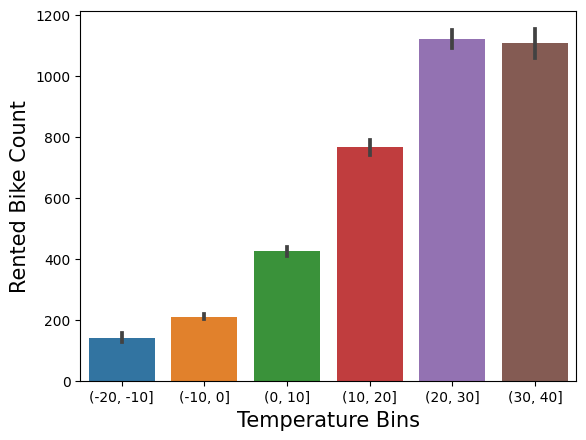

In [23]:
# Let's plot a bar chart to see graph Rented Bike Count vs Temperature
sns.barplot(x=data['Temperature_Bins'], y=data['Rented_Bike_Count'])

# Set the axis labels
plt.xlabel('Temperature Bins' , fontsize=15)
plt.ylabel('Rented Bike Count', fontsize=15)

# Display the plot
plt.show()


[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

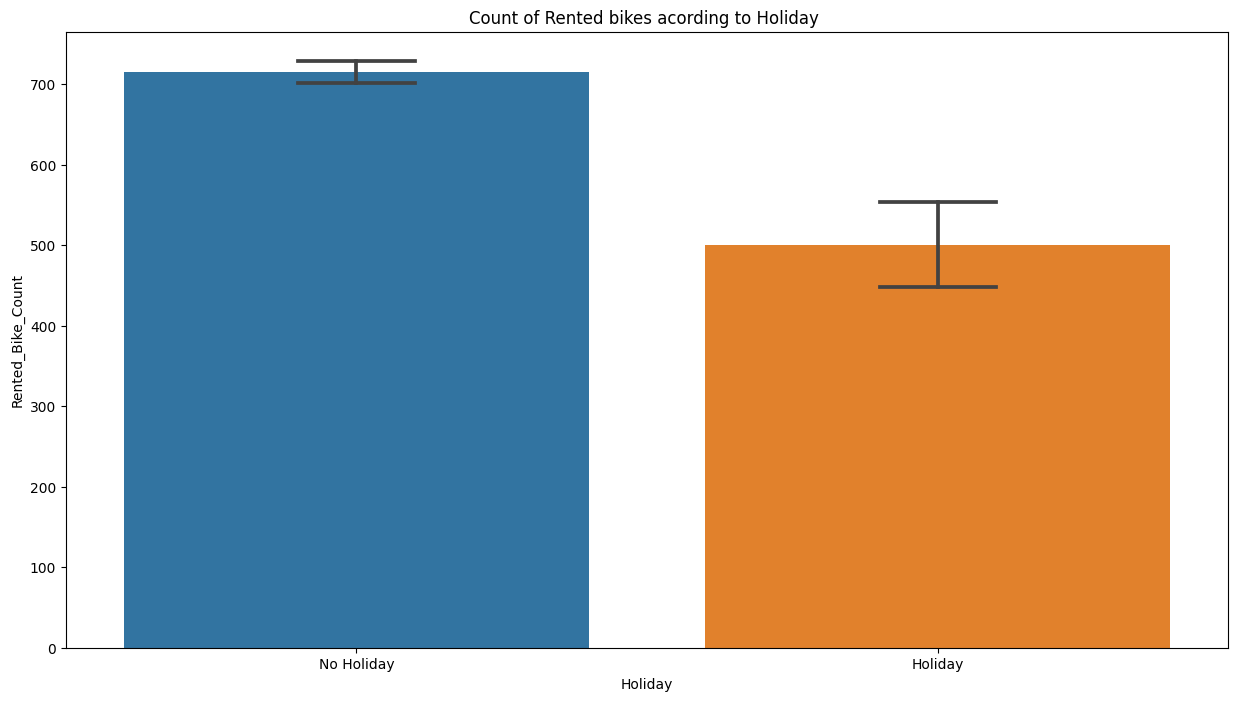

In [24]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=data,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

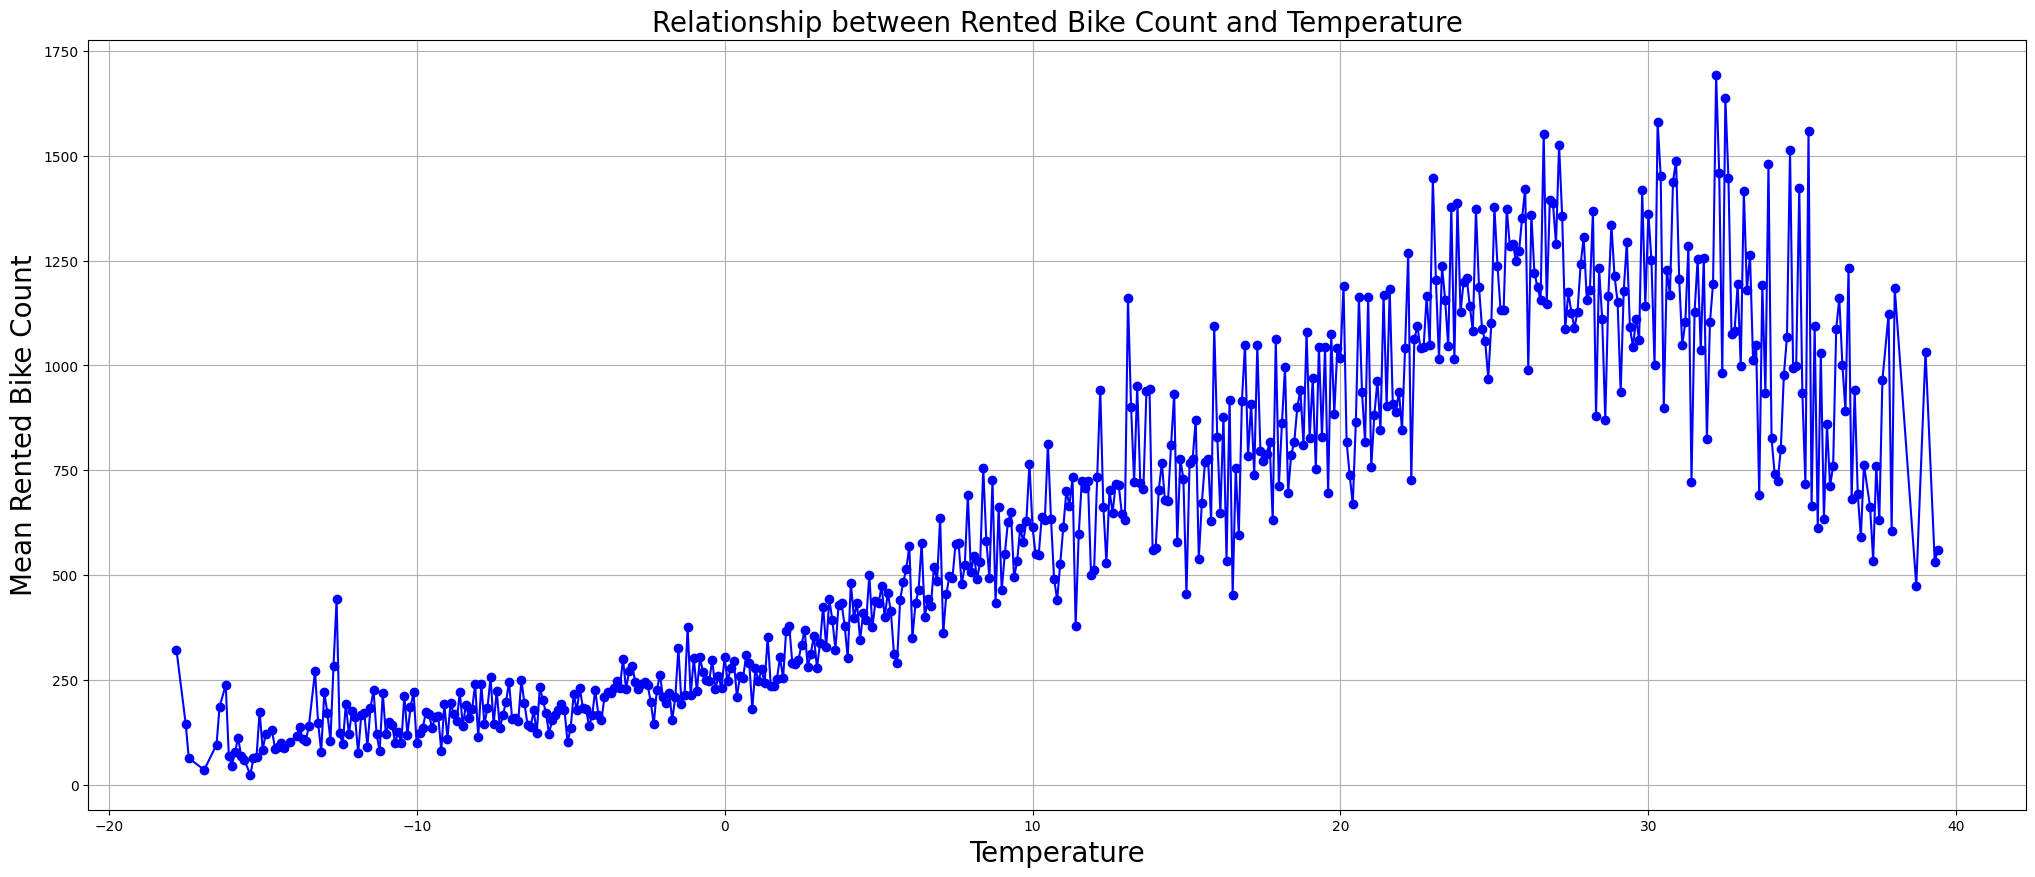

In [25]:
# Let's Group the data by 'Temperature' and calculate the mean of 'Rented_Bike_Count'
grouped_data = data.groupby('Temperature')['Rented_Bike_Count'].mean()

# Let's Plotting the relationship between 'Rented_Bike_Count' and 'Temperature'
plt.figure(figsize=(25, 10))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', color='b')
plt.xlabel('Temperature',fontsize=20)
plt.ylabel('Mean Rented Bike Count',fontsize=20)
plt.title('Relationship between Rented Bike Count and Temperature',fontsize=20)
plt.grid(True)
plt.show()


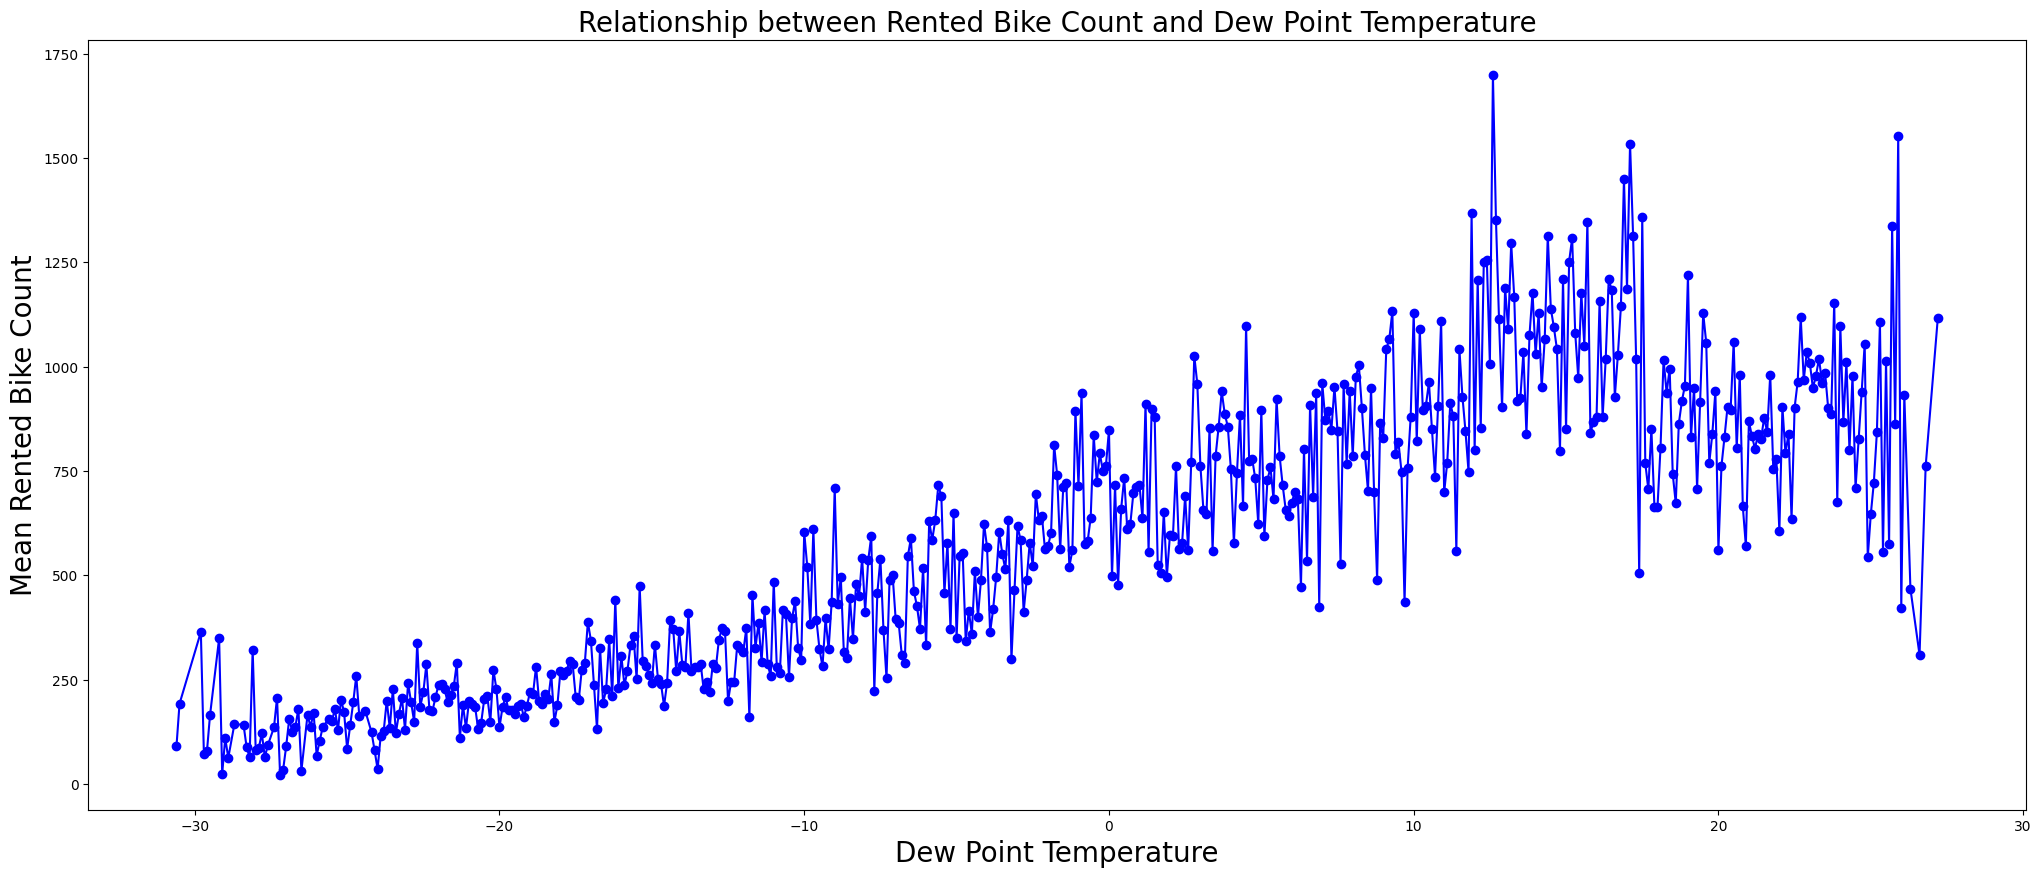

In [26]:
# Let's plot Relationship between Rented Bike Count and Dew Point Temperature.
plt.figure(figsize=(25, 10))
data.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot(marker='o', linestyle='-', color='b')

plt.xlabel('Dew Point Temperature',fontsize=20)
plt.ylabel('Mean Rented Bike Count',fontsize=20)
plt.title('Relationship between Rented Bike Count and Dew Point Temperature',fontsize=20)

plt.show()


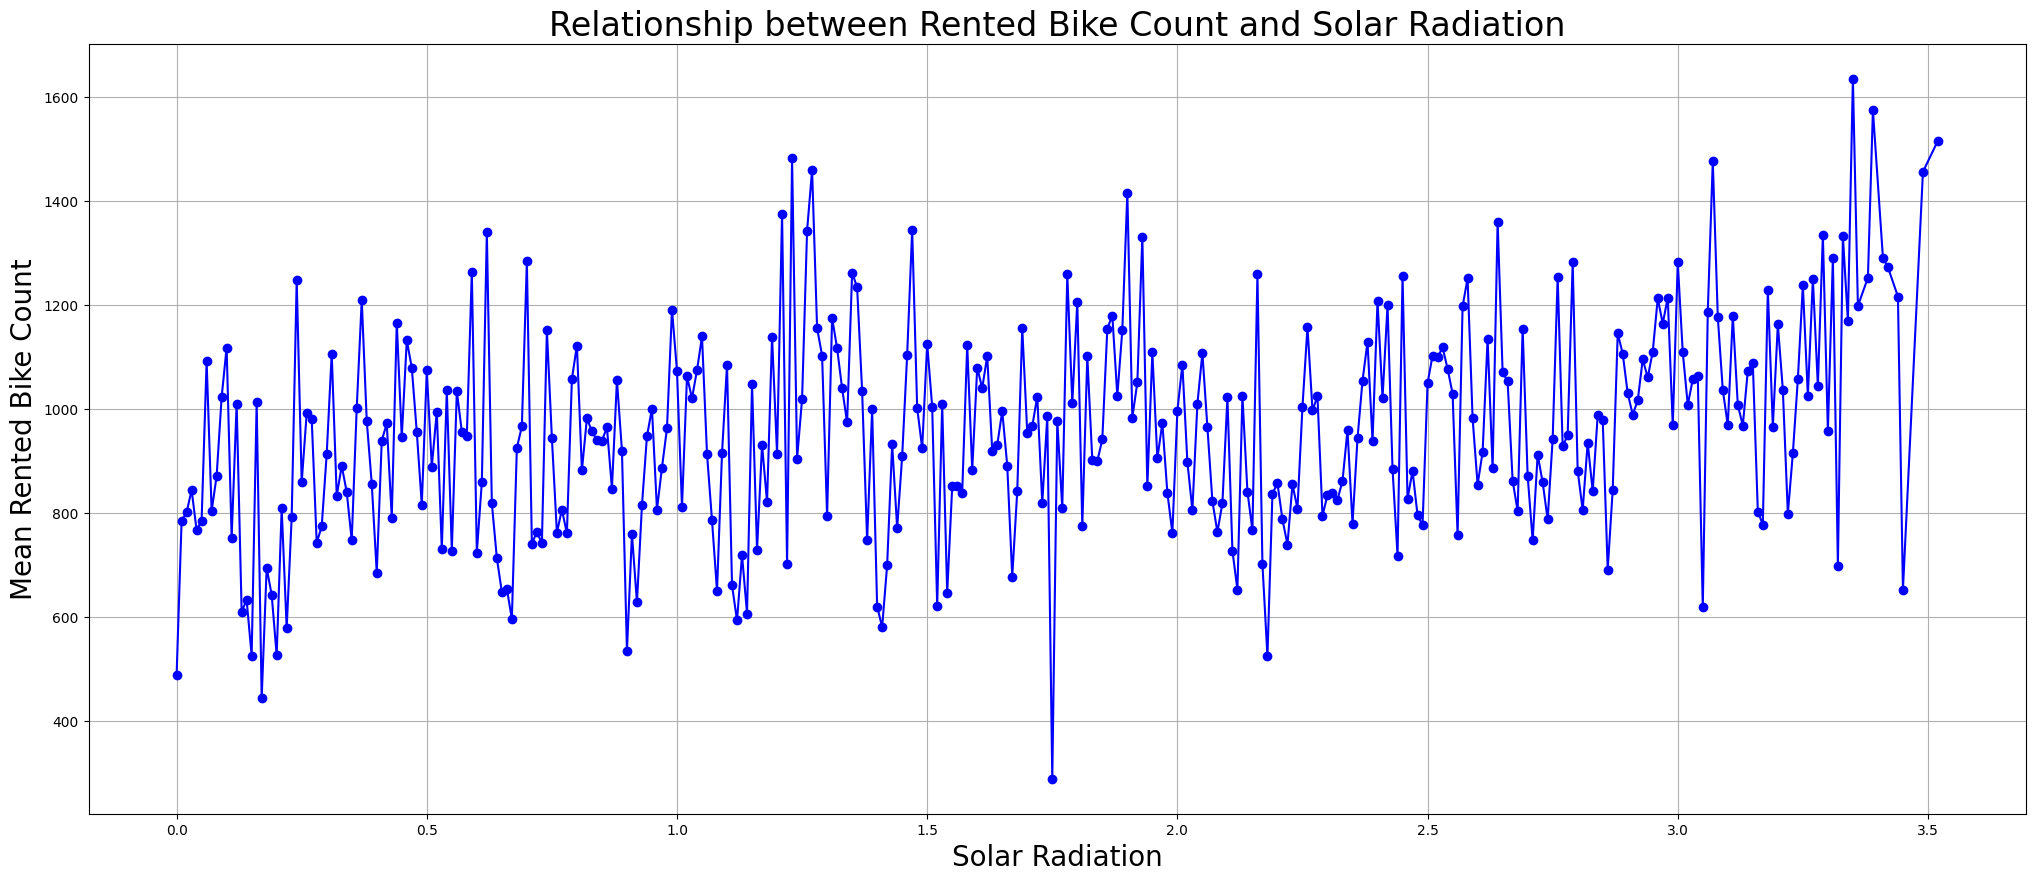

<Figure size 2500x1000 with 0 Axes>

In [27]:
# Let's plot a graph about Relationship between Rented Bike Count and Solar Radiation.
plt.figure(figsize=(25,10))
data.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot(marker='o', linestyle='-', color='b')
plt.xlabel('Solar Radiation', fontsize=20)  
plt.ylabel('Mean Rented Bike Count', fontsize=20)  
plt.title('Relationship between Rented Bike Count and Solar Radiation', fontsize=24)
plt.grid(True)
plt.figure(figsize=(25, 10))

plt.show()


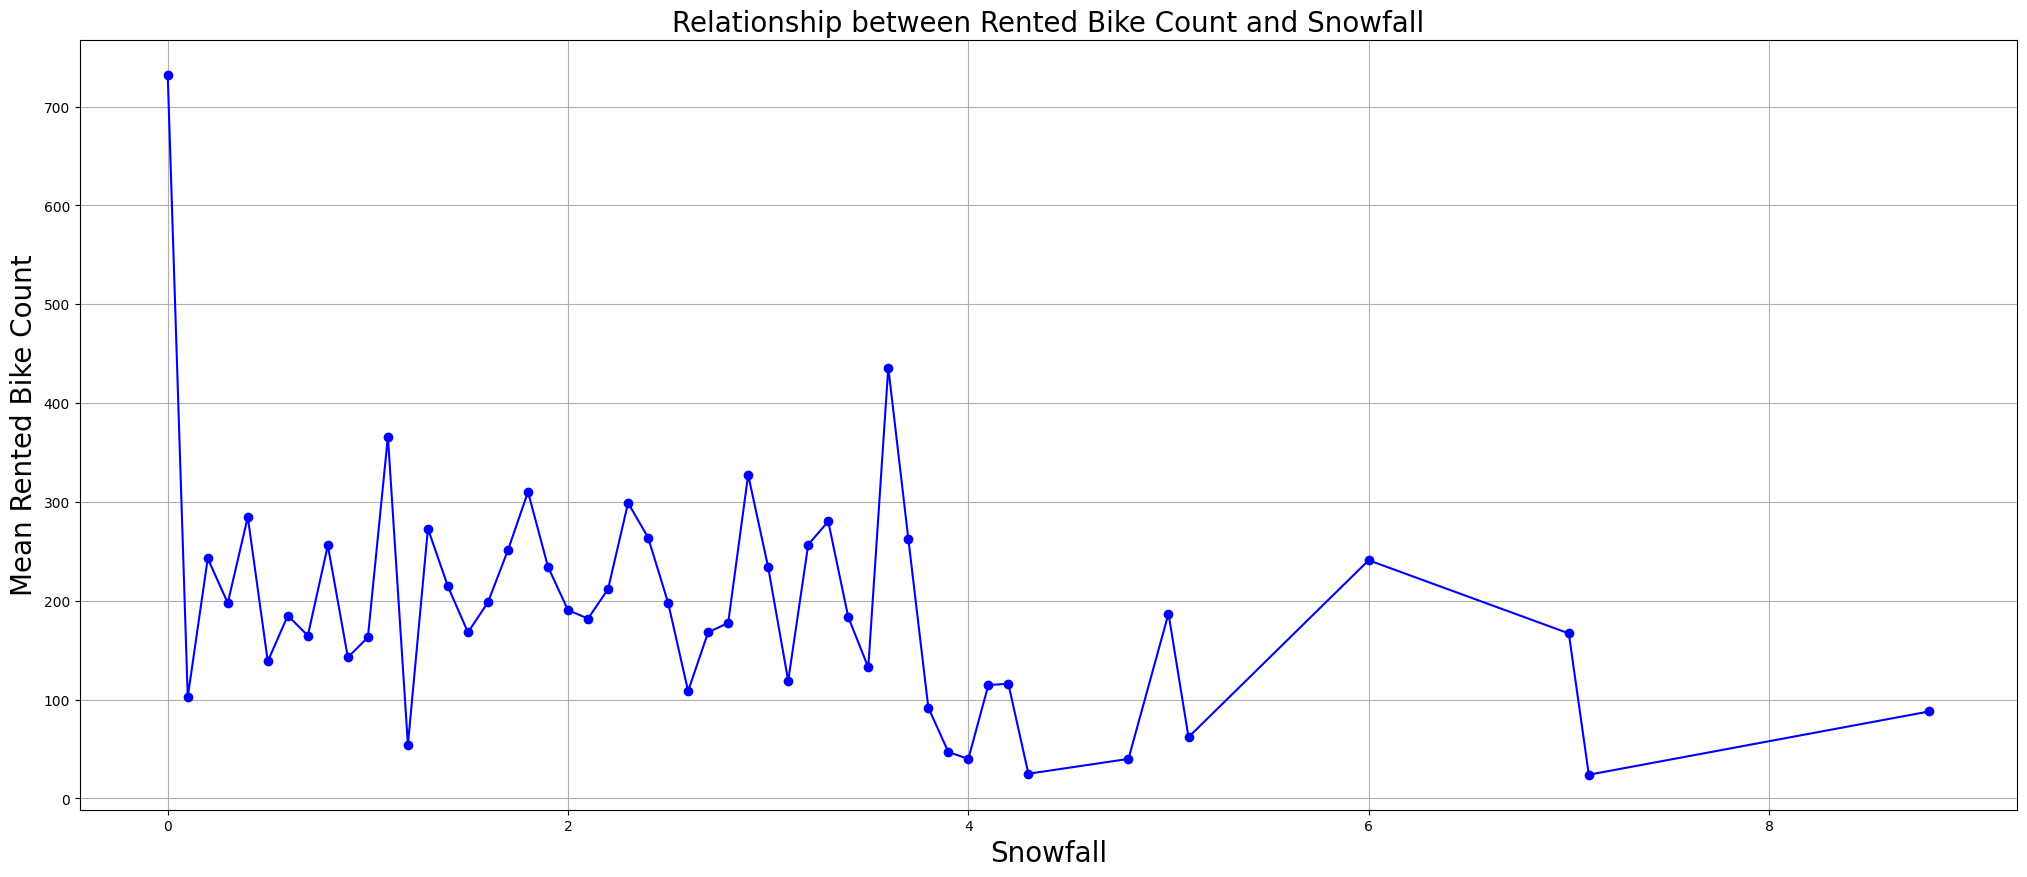

In [28]:
# Let's plot a graph about Relationship between Rented Bike Count and Snowfall .
# Group the data by 'Snowfall' and calculate the mean of 'Rented_Bike_Count'
grouped_data = data.groupby('Snowfall')['Rented_Bike_Count'].mean()

# Plotting the relationship between 'Rented_Bike_Count' and 'Snowfall'
plt.figure(figsize=(25,10))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', color='b')
plt.xlabel('Snowfall',fontsize=20)
plt.ylabel('Mean Rented Bike Count',fontsize=20)
plt.title('Relationship between Rented Bike Count and Snowfall',fontsize=20)
plt.grid(True)
plt.show()


* from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000

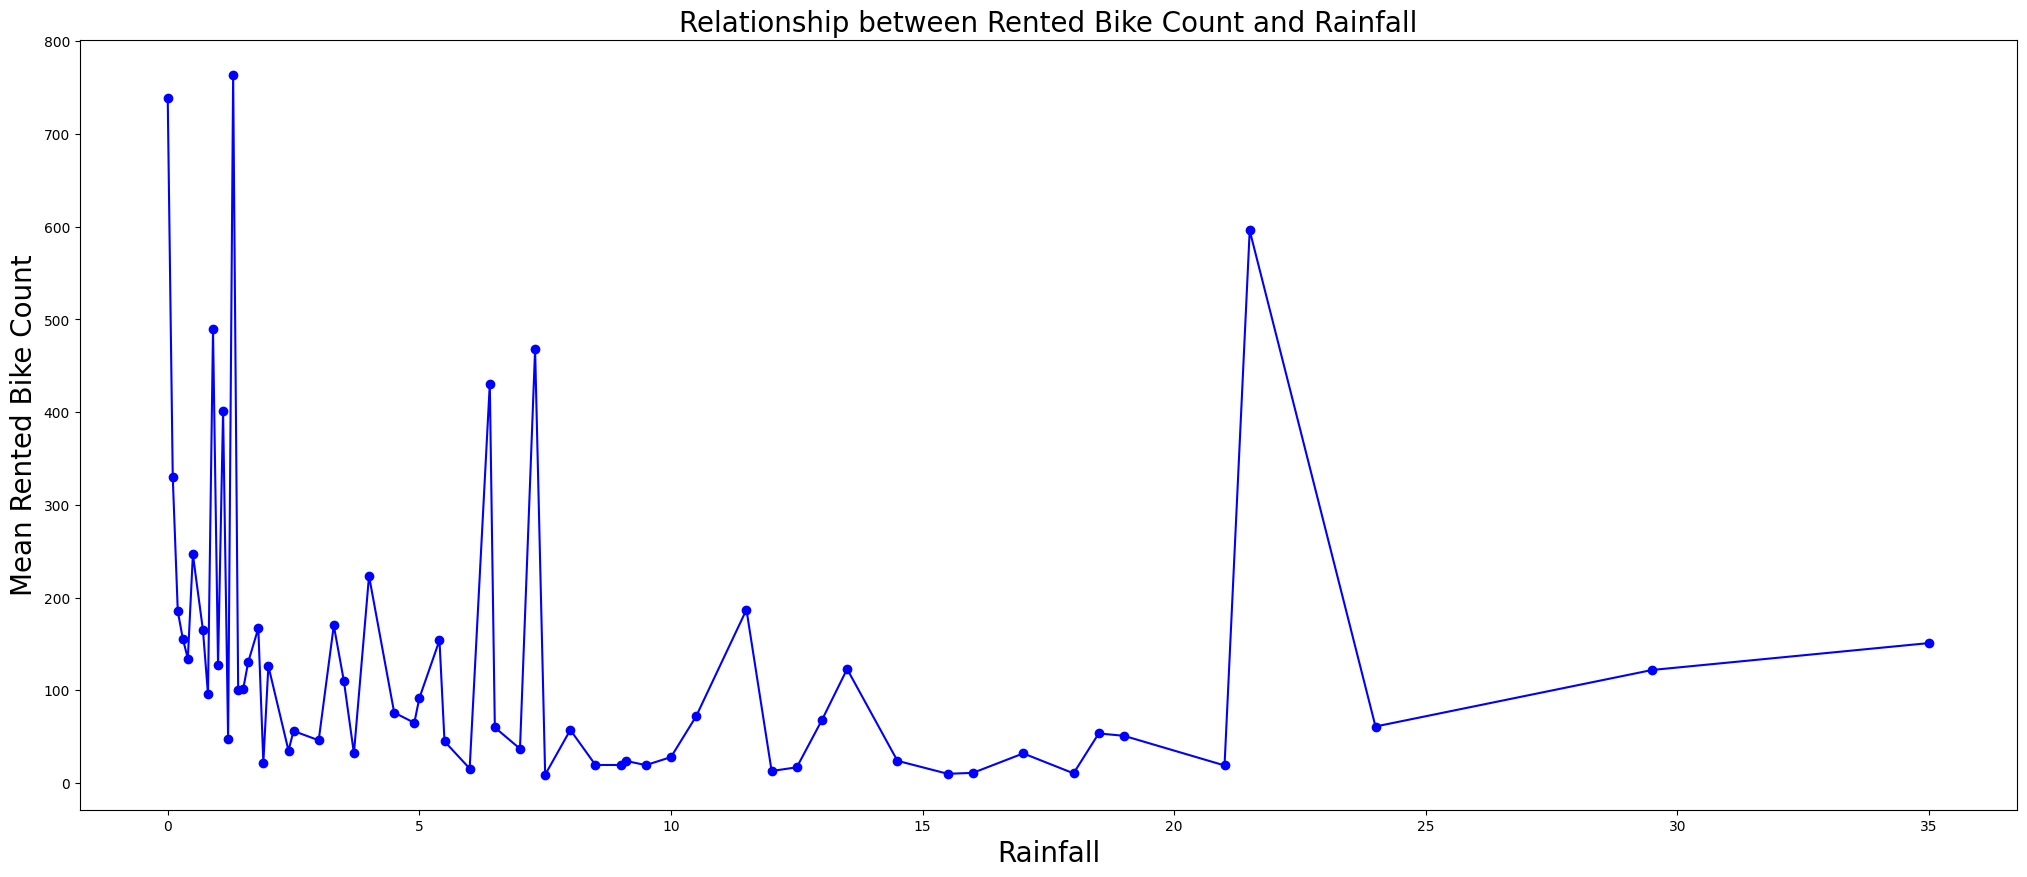

In [29]:
# Let's plot a graph inorder to understand Relationship between Rented Bike Count and Rainfall

plt.figure(figsize=(25,10))
data.groupby('Rainfall').mean()['Rented_Bike_Count'].plot(marker='o', linestyle='-', color='b')

plt.xlabel('Rainfall',fontsize=20)
plt.ylabel('Mean Rented Bike Count',fontsize=20)
plt.title('Relationship between Rented Bike Count and Rainfall',fontsize=20)

plt.show()


####Regression plot

* ***The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.***

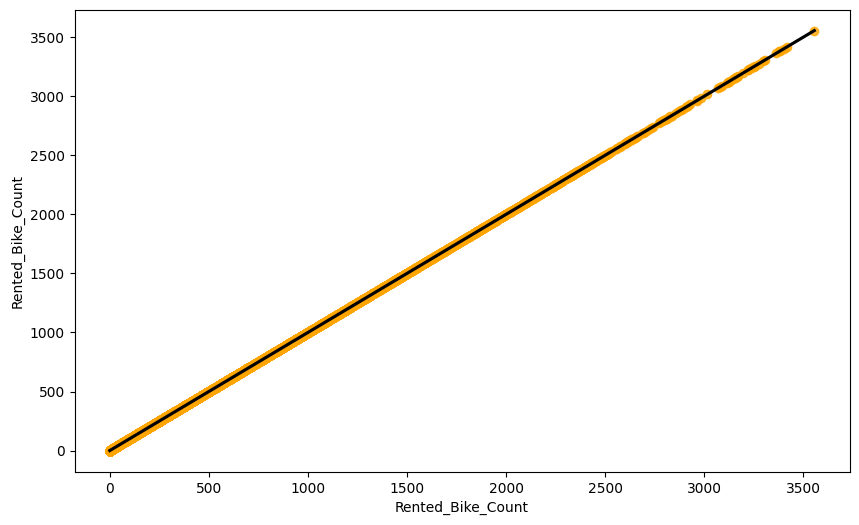

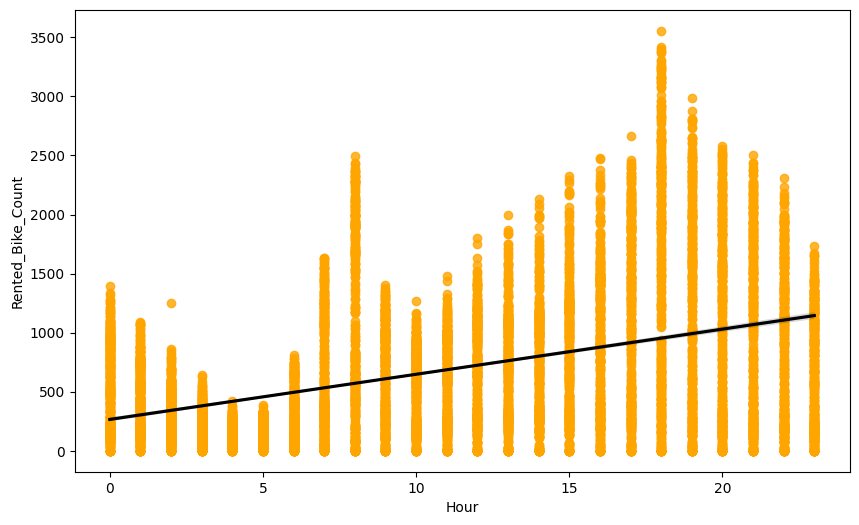

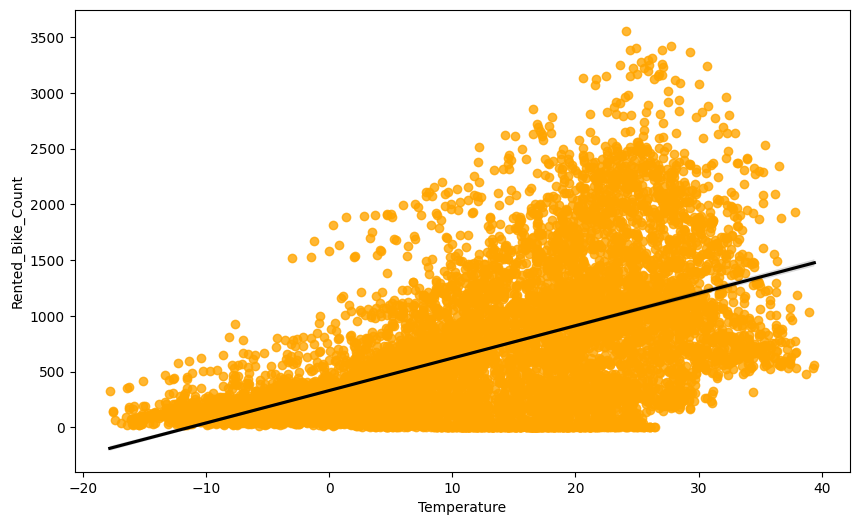

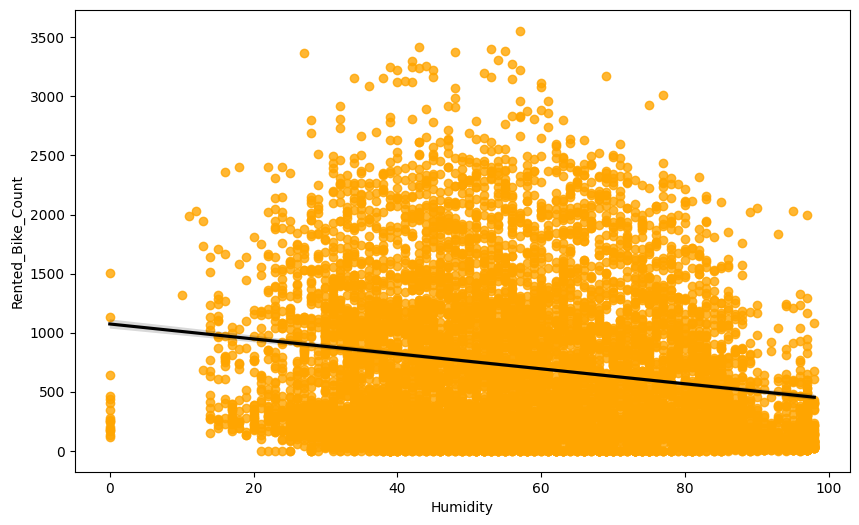

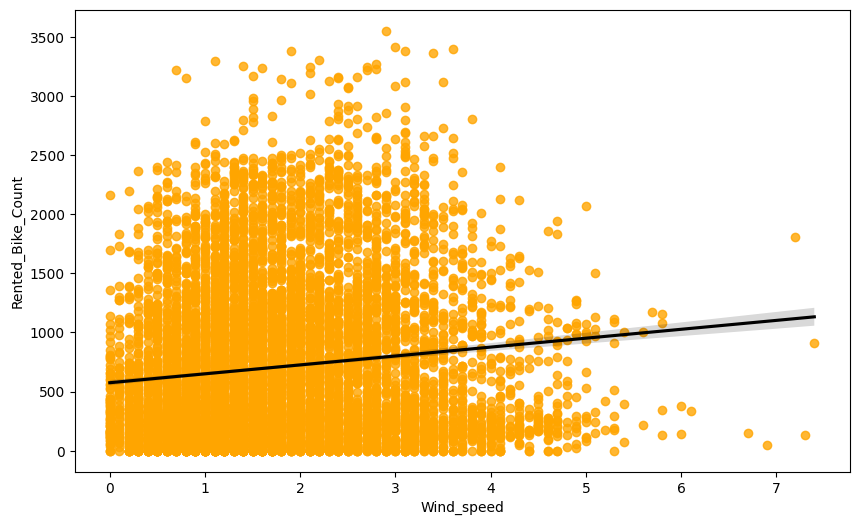

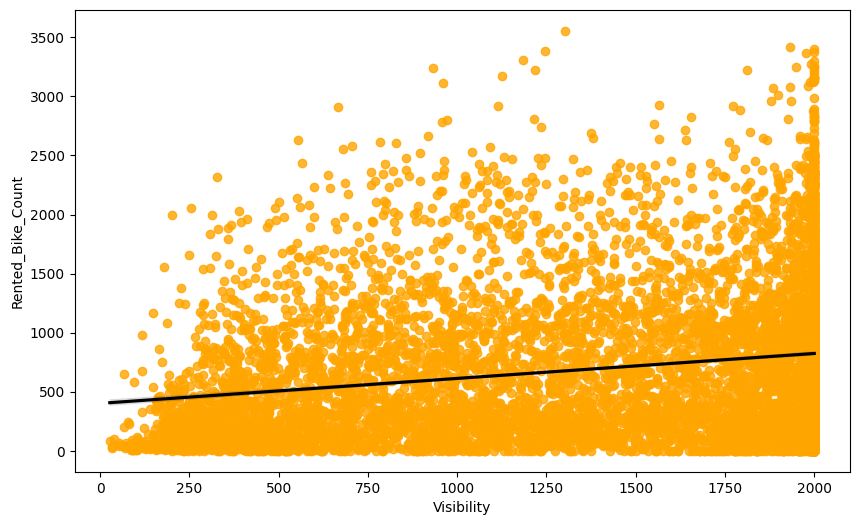

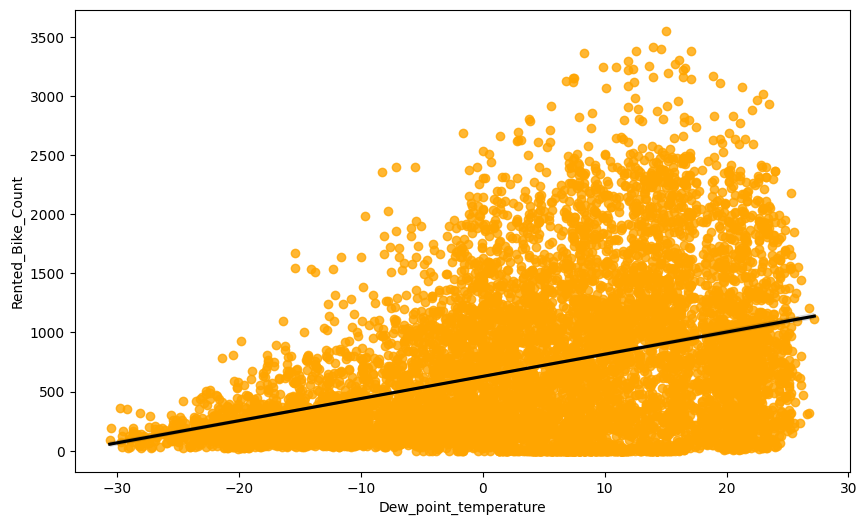

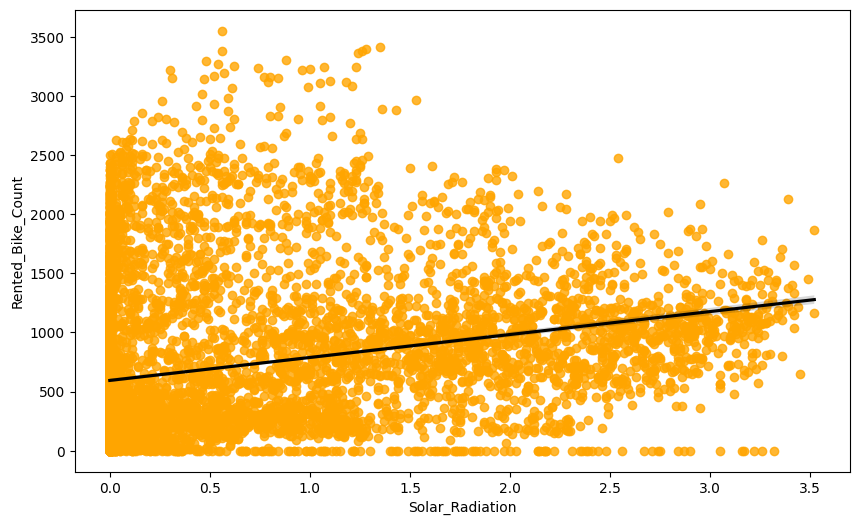

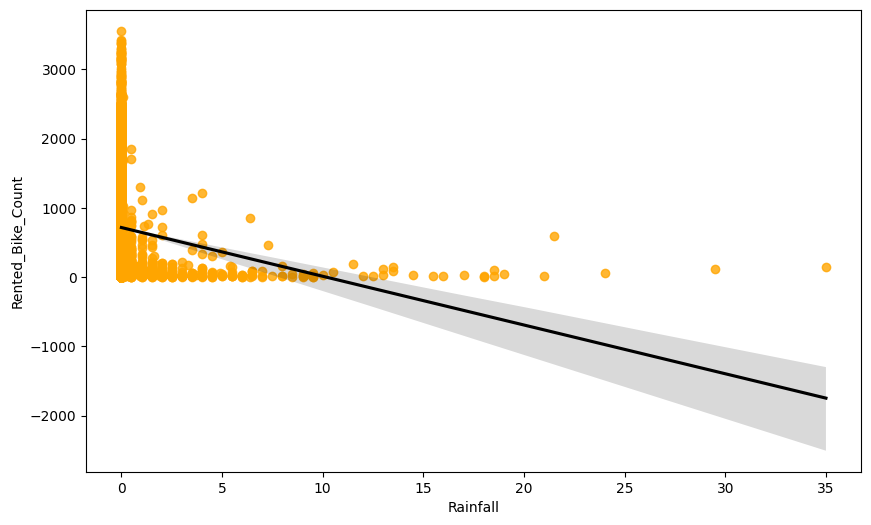

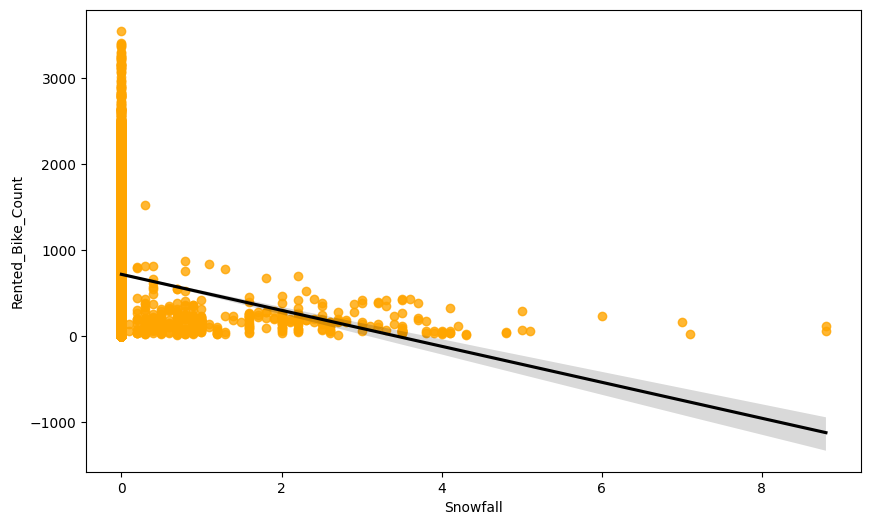

In [30]:
# Let's print the regression plot for all the numerical features
for col in num_dat:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=data[col],y=data['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

<Axes: >

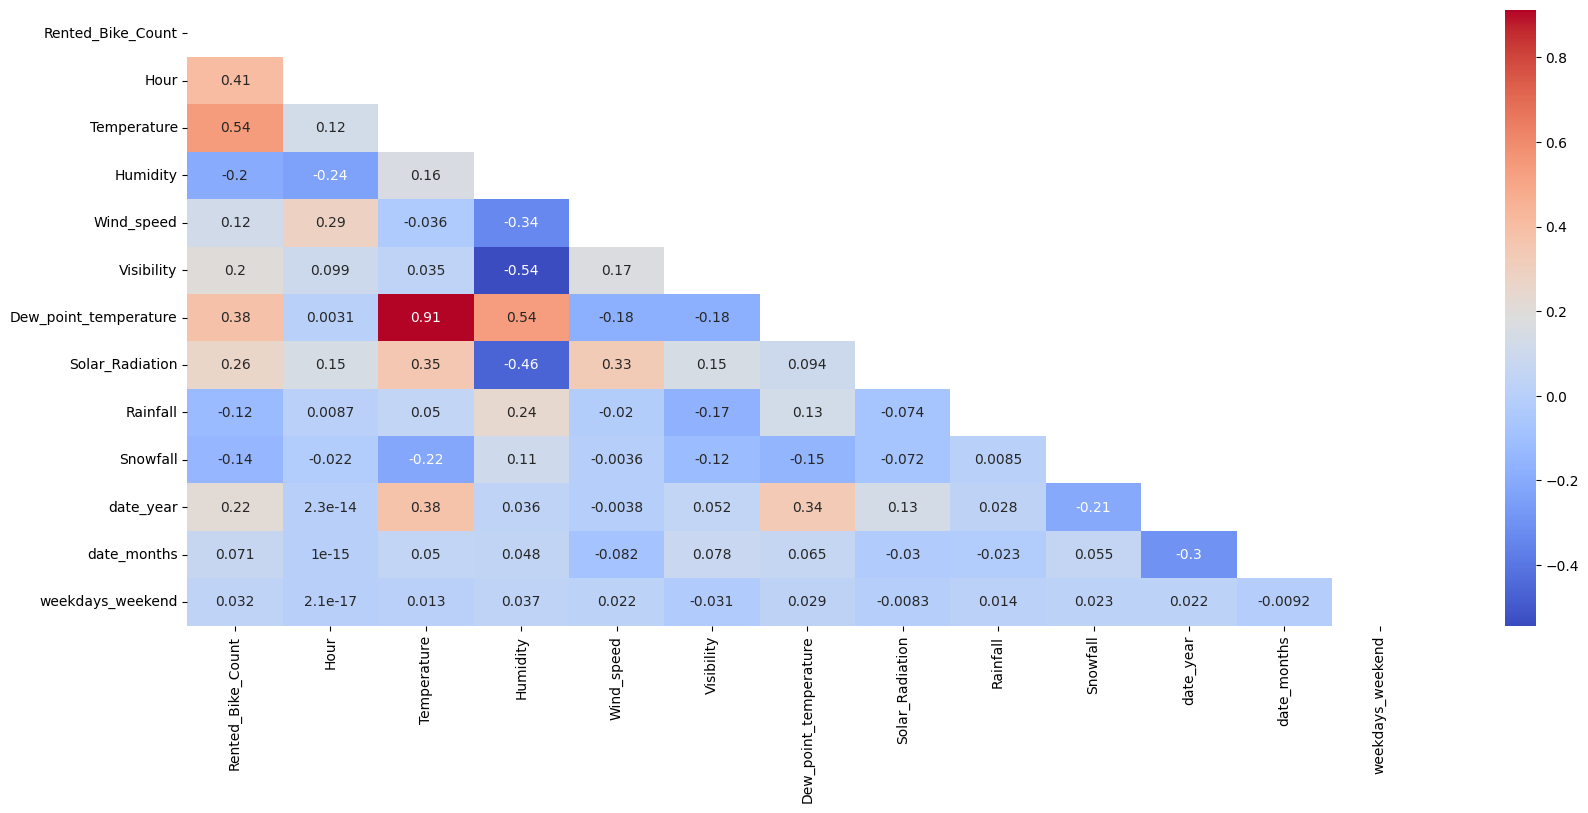

In [31]:
# Let's plot heatmap to see the correlation of feature to each other.
plt.figure(figsize=(20, 8))
correlation = data.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, cmap='coolwarm')

From the above heatmap we can clearly see temperature and Dew point temperature is highly correlated with each other, so we can drop from the our dataframe.

## Outlier Treatment

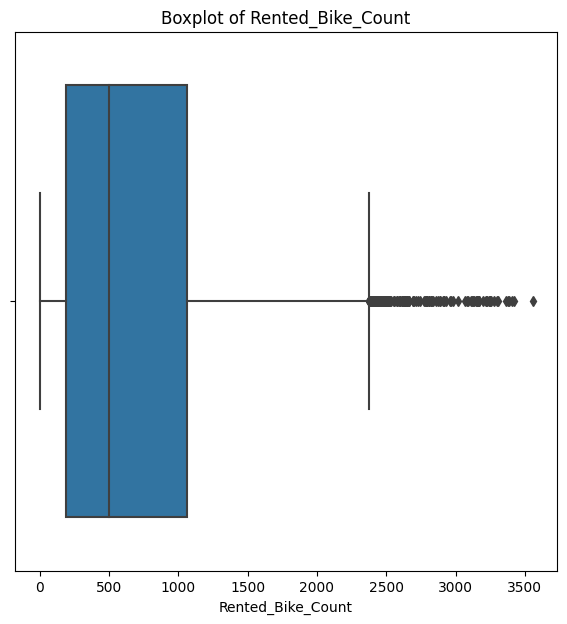

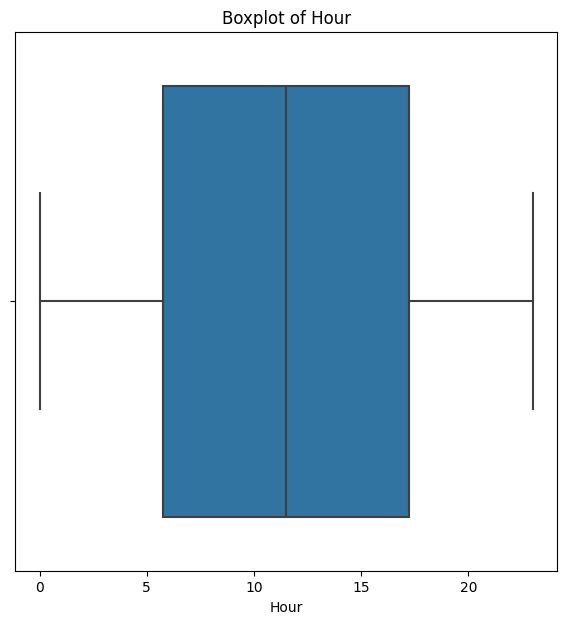

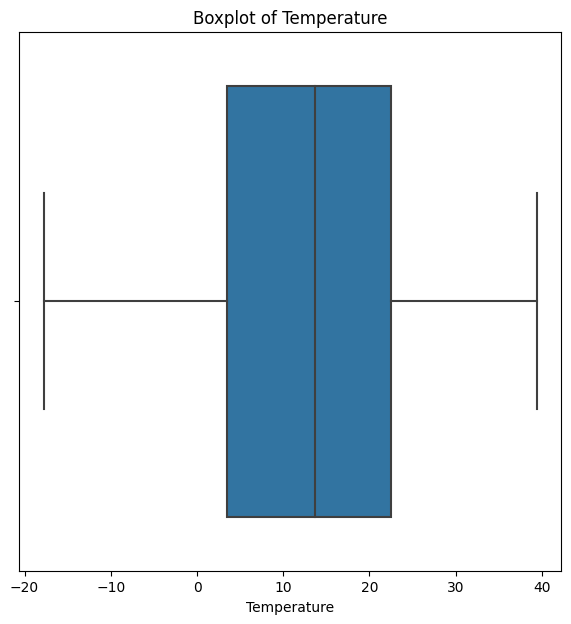

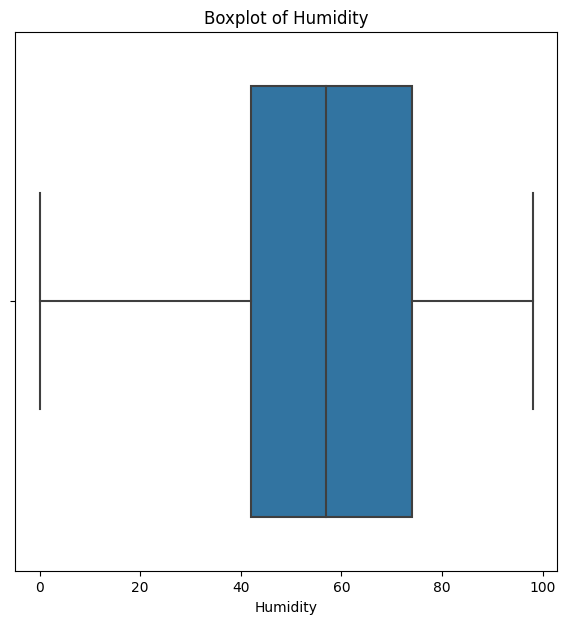

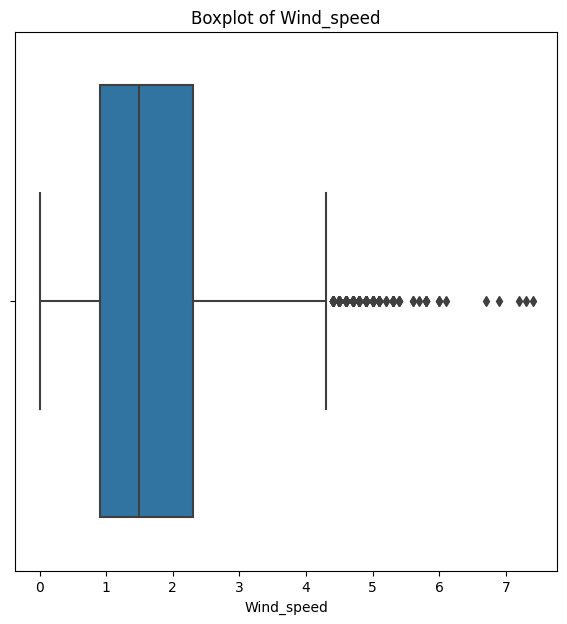

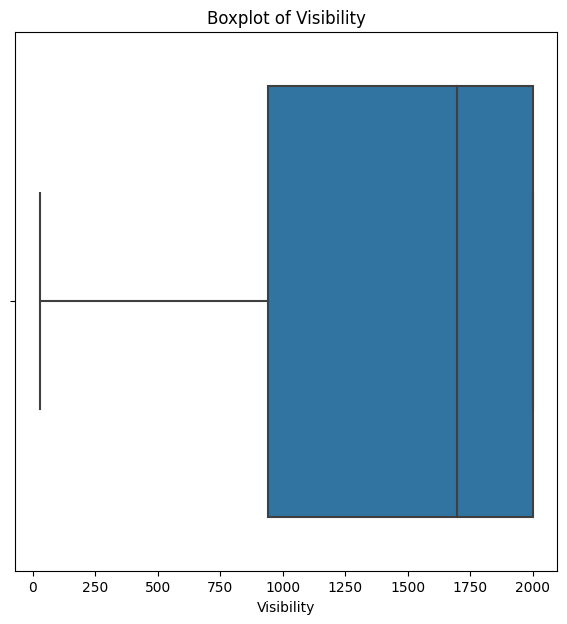

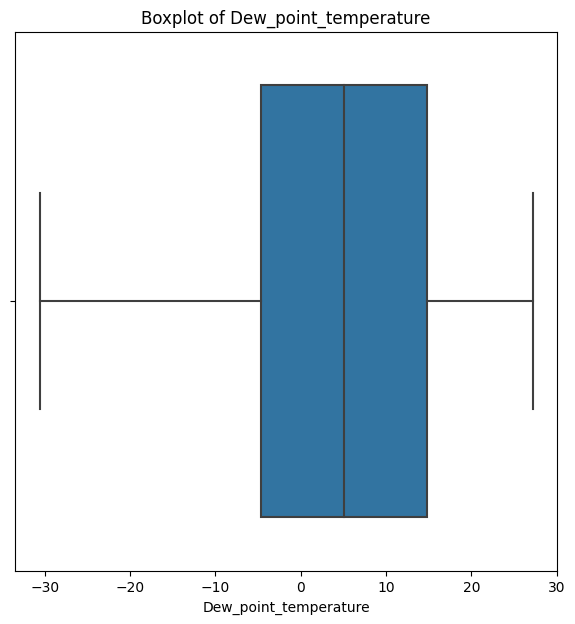

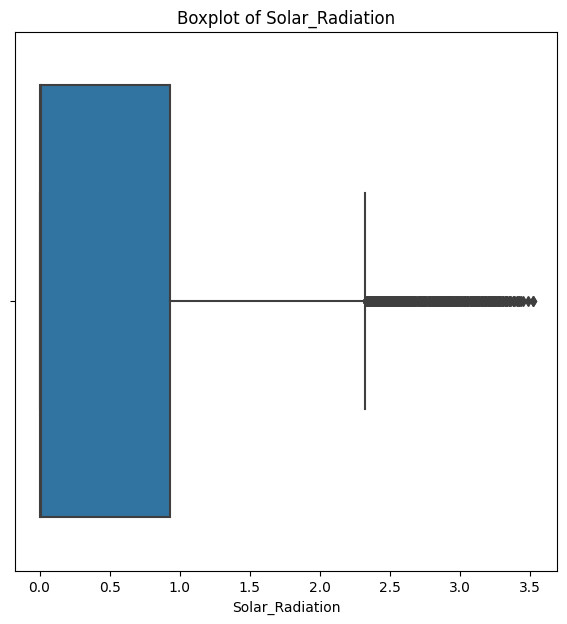

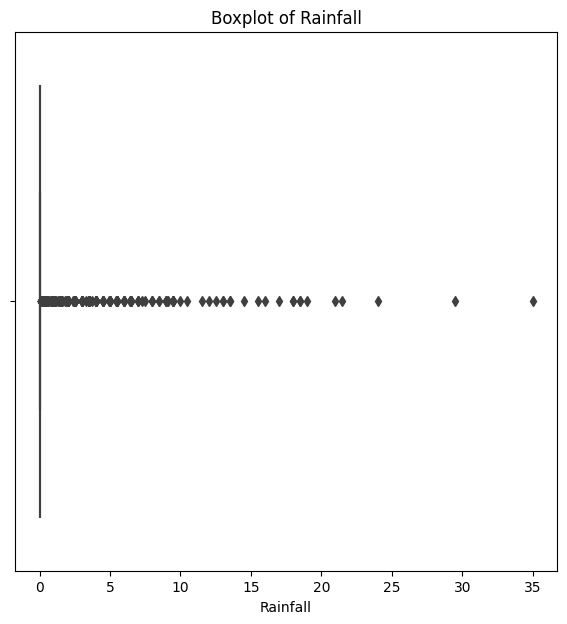

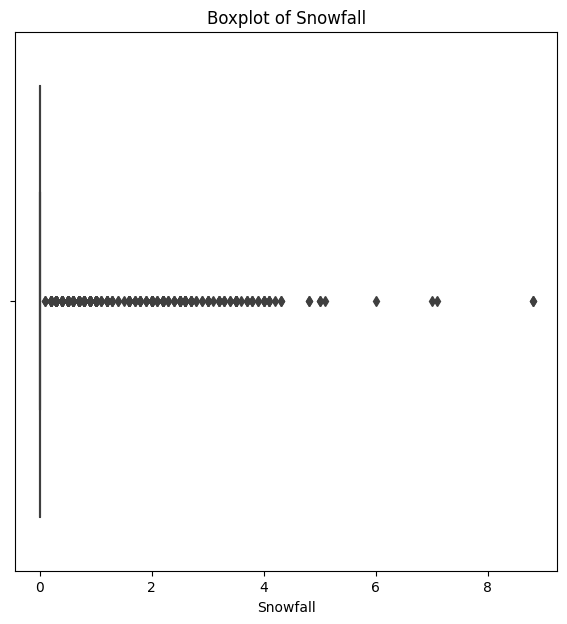

In [32]:
# Create separate boxplots for each column in 'num_dat'
for column in num_dat.columns:
    plt.figure(figsize=(7, 7))
    sns.boxplot(x=num_dat[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()


In [33]:
# Let's calculate max value of Rented Bike Count.
data['Rented_Bike_Count'].max()

3556

In [34]:
# Finding the boundary values
print("Highest allowed",data['Rented_Bike_Count'].mean() + 3*data['Rented_Bike_Count'].std())
print("Lowest allowed",data['Rented_Bike_Count'].mean() - 3*data['Rented_Bike_Count'].std())

Highest allowed 2639.5944580121673
Lowest allowed -1230.3903484231264


# **Capping**

In [35]:
# Let's define our boundary upper and lower.
upper_limit = data['Rented_Bike_Count'].mean() + 3*data['Rented_Bike_Count'].std()
lower_limit = data['Rented_Bike_Count'].mean() - 3*data['Rented_Bike_Count'].std()

In [36]:
print(upper_limit)

2639.5944580121673


In [37]:
# Let's find outlier by appling filter feature
data[(data['Rented_Bike_Count'] > 2639.59)].head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,date_year,date_months,date_day,weekdays_weekend,Temperature_Bins
3282,2018-04-16,2692,18,17.0,28,3.1,2000,-1.6,0.88,0.0,0.0,Spring,No Holiday,Yes,2018,4,Monday,1,"(10, 20]"
3498,2018-04-25,2807,18,21.2,32,3.8,1927,3.8,0.94,0.0,0.0,Spring,No Holiday,Yes,2018,4,Wednesday,1,"(20, 30]"
3714,2018-04-05,2661,18,17.1,35,3.4,1961,1.4,1.11,0.0,0.0,Spring,No Holiday,Yes,2018,4,Thursday,1,"(10, 20]"
3834,2018-09-05,3130,18,20.6,41,2.3,2000,6.8,1.10,0.0,0.0,Spring,No Holiday,Yes,2018,9,Wednesday,1,"(20, 30]"
3882,2018-11-05,2701,18,17.9,37,3.1,1819,2.9,0.36,0.0,0.0,Spring,No Holiday,Yes,2018,11,Monday,1,"(10, 20]"


Ensures that any 'Rented_Bike_Count' value that is above the 'upper_limit' is replaced with the 'upper_limit', and any value below the 'lower_limit' is replaced with the 'lower_limit', effectively treating outliers in the dataset.

In [38]:
# Let's create a function for treating outlier.

data['Rented_Bike_Count'] = np.where(
    data['Rented_Bike_Count']>upper_limit,
    upper_limit,
    np.where(
        data['Rented_Bike_Count']<lower_limit,
        lower_limit,
        data['Rented_Bike_Count']
    )
)

<Axes: xlabel='Rented_Bike_Count'>

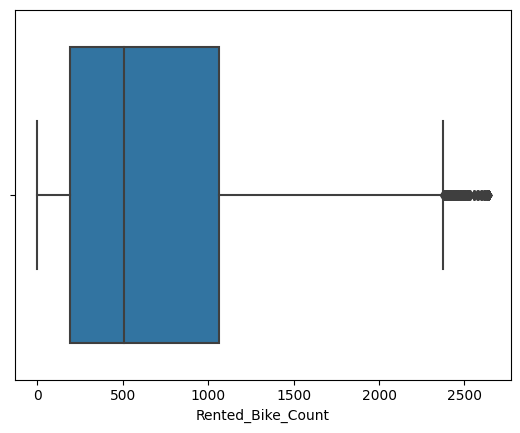

In [39]:
# Let's plot boxplot in order to see outlier's treatment of our dataset.
sns.boxplot(x=data['Rented_Bike_Count'])

<Axes: xlabel='Rented_Bike_Count', ylabel='Density'>

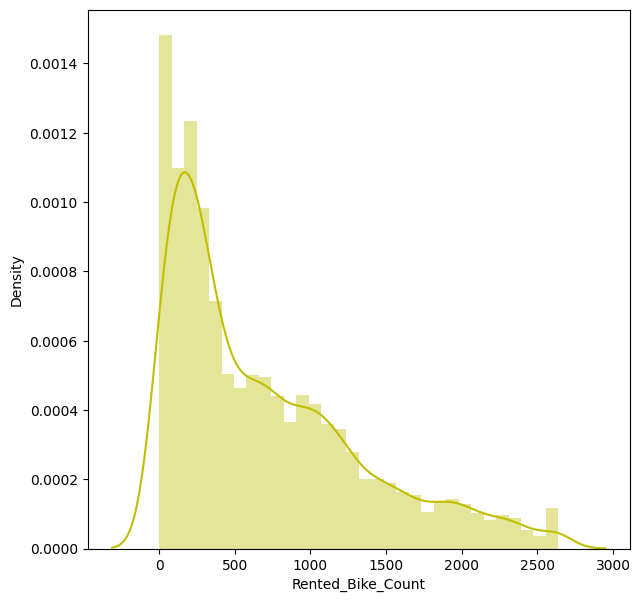

In [40]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(data['Rented_Bike_Count'],color="y")

In [41]:
# Let's find out skewness of our Rented Bike Count feature 
data['Rented_Bike_Count'].skew()

1.0638389315694605

In [42]:
# Let's visualize Pair Plot visualization code

# sns.pairplot(data ,corner=True)
# plt.legend()

In [43]:
# Let's check count the 0 value for our depent feature 
data[data['Rented_Bike_Count']==0].size

5605

In [44]:
data.sample(5)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,date_year,date_months,date_day,weekdays_weekend,Temperature_Bins
6208,2018-08-16,902.0,16,34.5,37,1.9,2000,17.6,2.36,0.0,0.0,Summer,No Holiday,Yes,2018,8,Thursday,1,"(30, 40]"
1811,2018-02-14,288.0,11,6.3,67,3.5,1179,0.6,0.52,0.0,0.0,Winter,No Holiday,Yes,2018,2,Wednesday,1,"(0, 10]"
1506,2018-01-02,542.0,18,-1.0,28,1.9,2000,-17.2,0.08,0.0,0.0,Winter,No Holiday,Yes,2018,1,Tuesday,1,"(-10, 0]"
6466,2018-08-27,104.0,10,21.7,97,1.0,1249,21.1,0.29,2.5,0.0,Summer,No Holiday,Yes,2018,8,Monday,1,"(20, 30]"
1541,2018-03-02,31.0,5,-6.3,65,3.9,1521,-11.8,0.00,0.0,0.3,Winter,No Holiday,Yes,2018,3,Friday,1,"(-10, 0]"


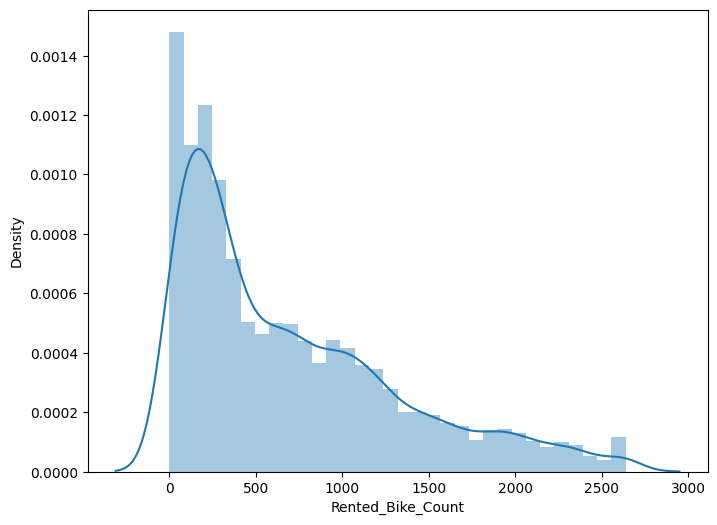

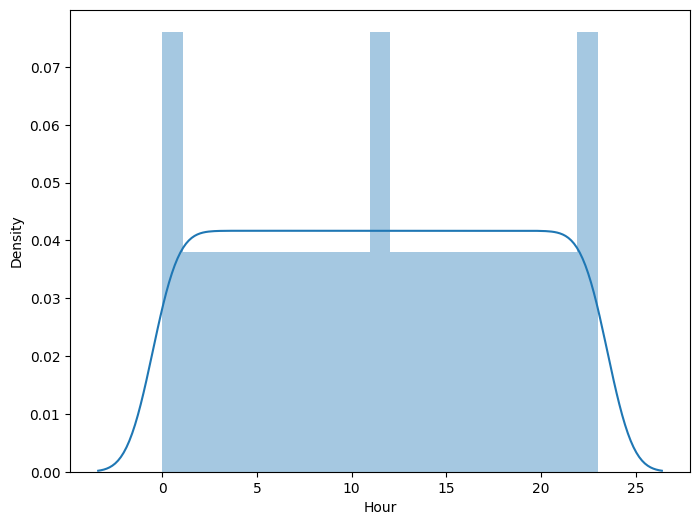

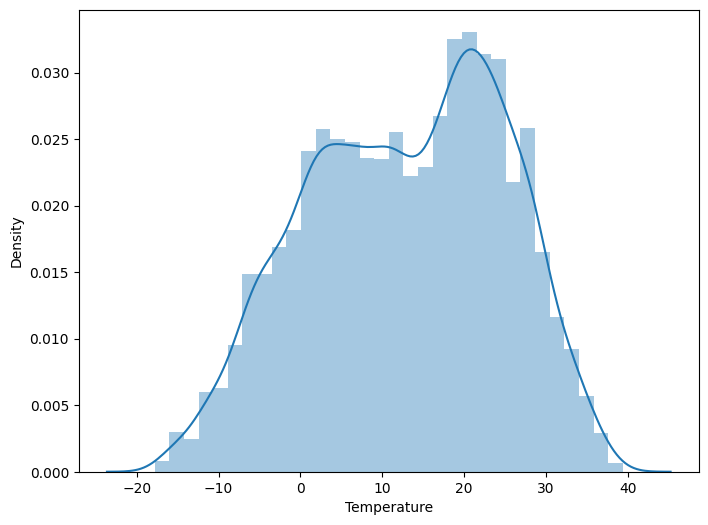

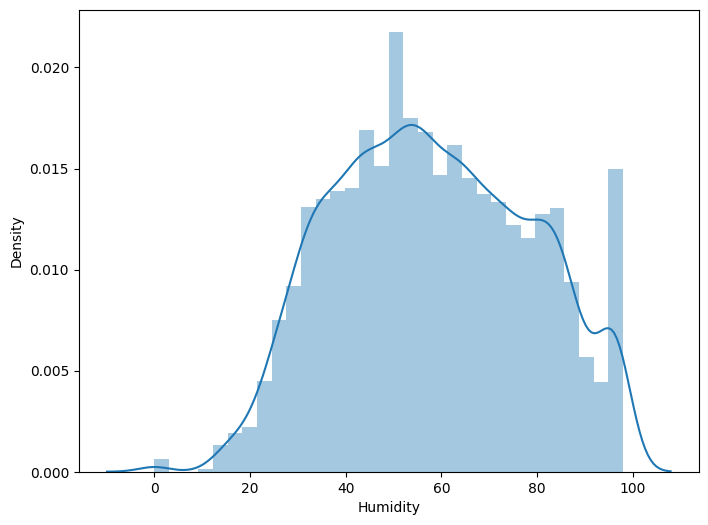

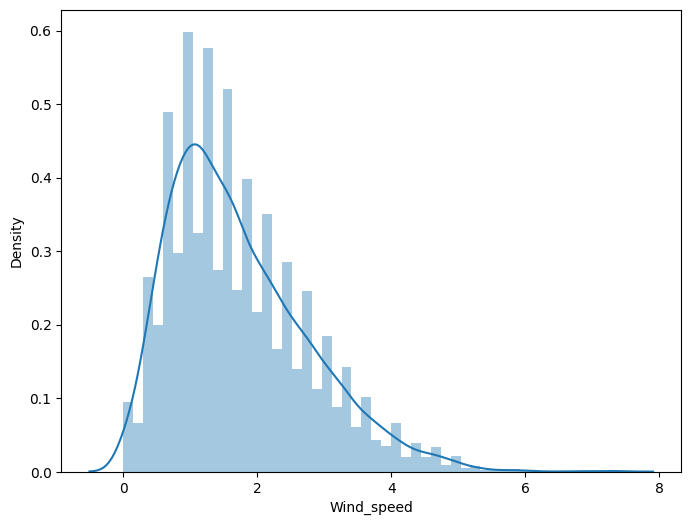

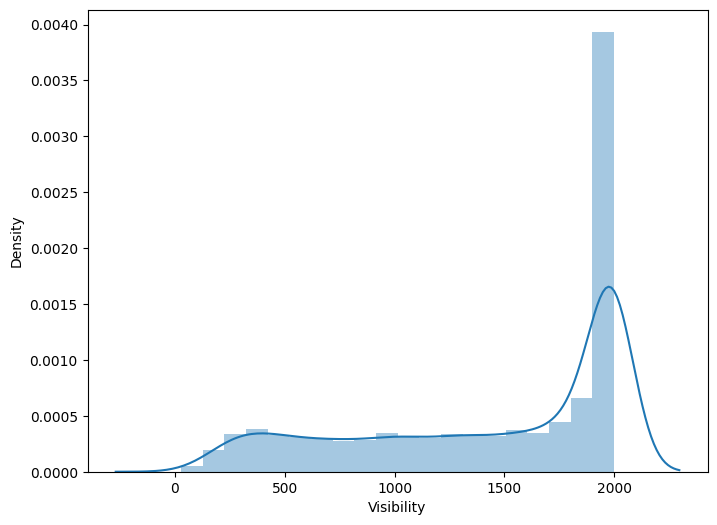

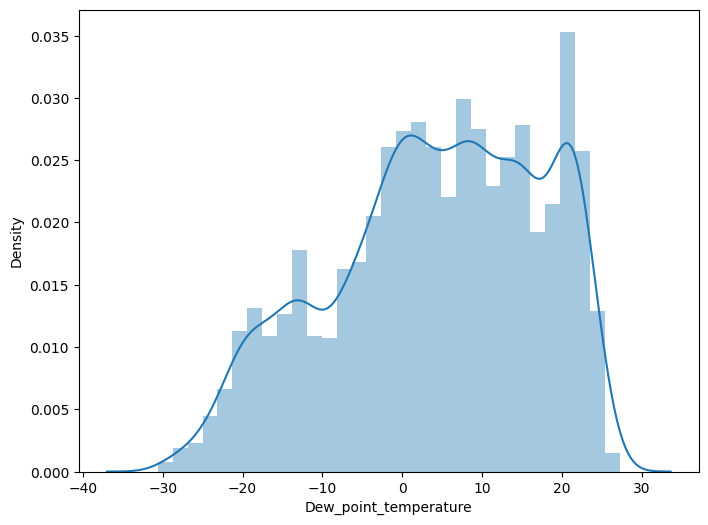

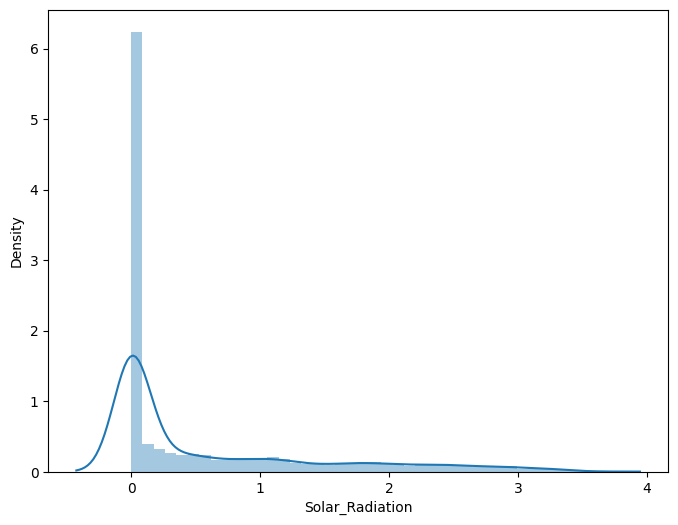

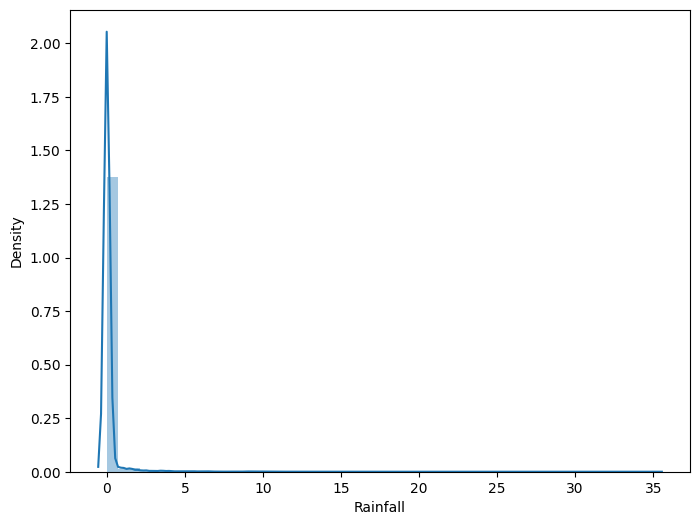

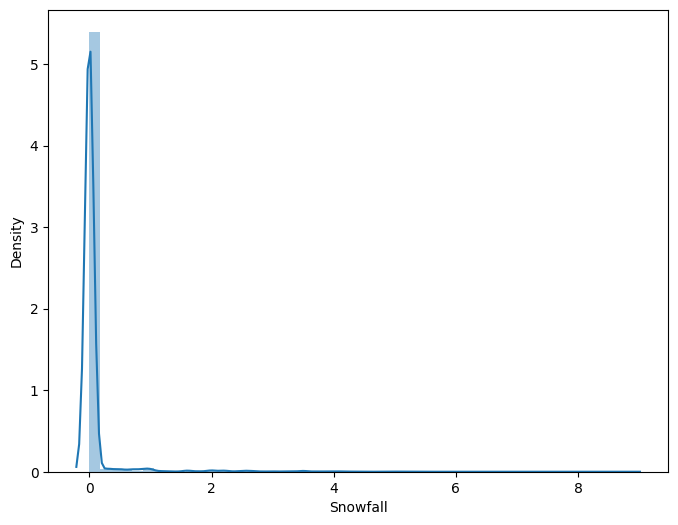

In [45]:
# Let's plot a graph distplot of all graph by using if else condition.

for col in num_dat:
  plt.figure(figsize=(8,6))
  sns.distplot(x=data[col])
  plt.xlabel(col)
plt.show()  

In [46]:
data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day',
       'date_year', 'date_months', 'date_day', 'weekdays_weekend',
       'Temperature_Bins'],
      dtype='object')

In [47]:
num_dat.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

#**Q-Q chart**

These plots compare the quantiles of the observed data against the quantiles of a theoretical distribution, typically the standard normal distribution. Let's  gain insights into the distributional properties of the data, identify departures from normality, and determine the need for data transformations.

In [48]:
# Let's plot Q-Q plot to see our data 

from scipy import stats

def diagnostic_plots(data,variable):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  data[variable].hist()
  plt.subplot(1,2,2)

  stats.probplot(data[variable],dist ='norm', plot=plt)
  plt.show()

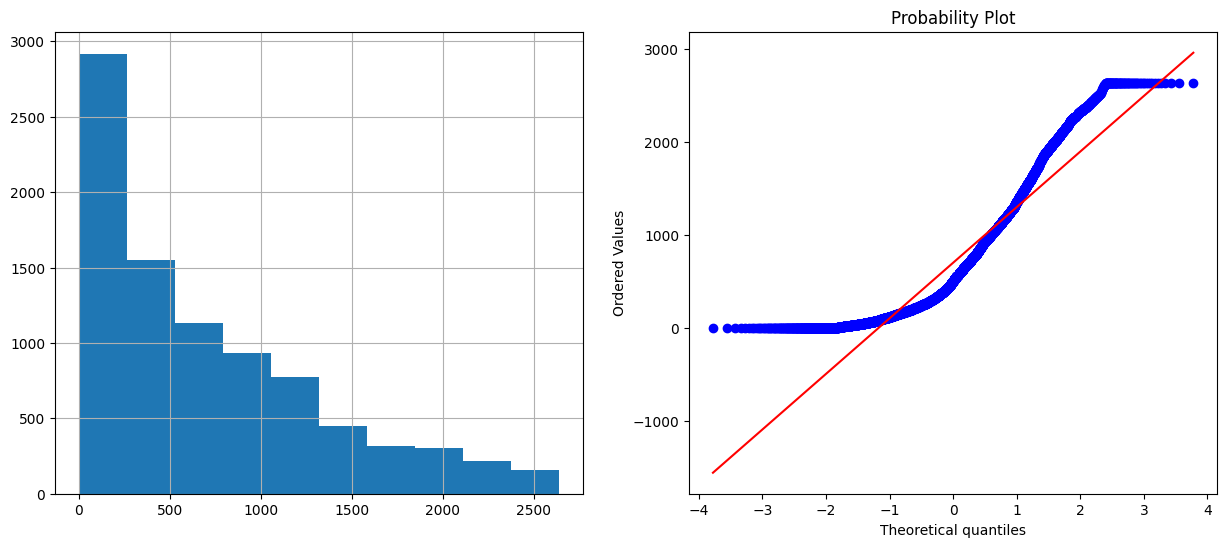

In [49]:
# Let's plot a graph diagnostic plot for Rented Bike Count 
diagnostic_plots(data,'Rented_Bike_Count')

In [50]:
data['Rented_Bike_Count'].skew()

1.0638389315694605

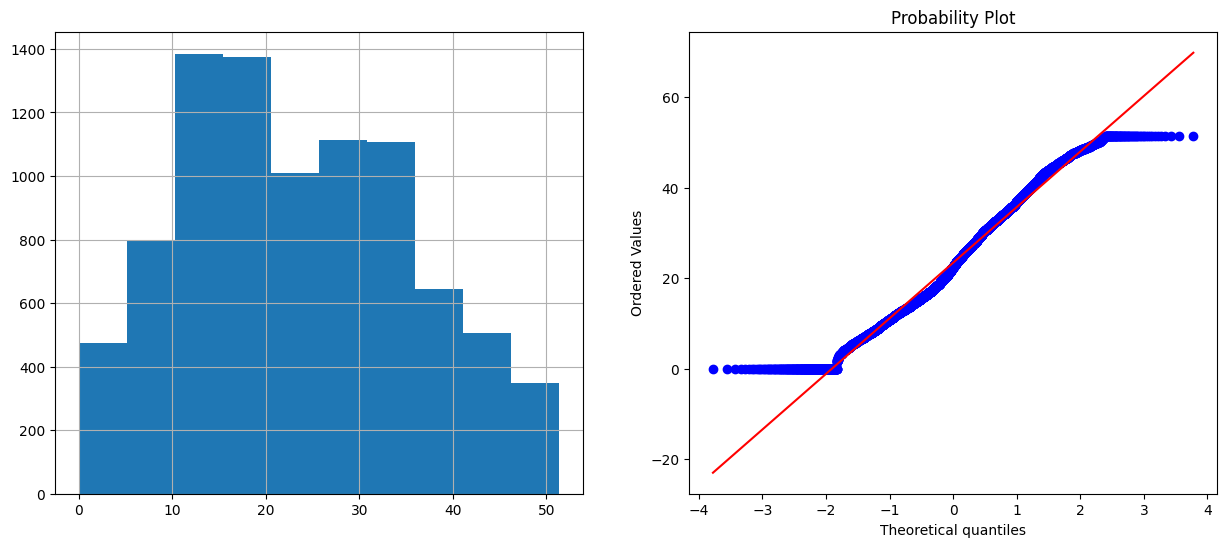

In [51]:
# Sqaure Root Tansformation
data['sqr_Rented_Bike_Count']=data['Rented_Bike_Count']**(1/2)
diagnostic_plots(data,'sqr_Rented_Bike_Count')

In [52]:
data['Rented_Bike_Count'].skew()

1.0638389315694605

In [53]:
data['sqr_Rented_Bike_Count'].skew()

0.210280472876656

#**Column Transformation**

Column Transformation is an essential step in preparing data for machine learning models. It involves modifying or encoding the features (columns) of the dataset to improve the performance and effectiveness of the machine learning algorithms. 

In [54]:
# Let's apply if else condition in order to see which skewness of our data
# Let's import skew function from scipy.stats library

from scipy.stats import skew

# Calculate skewness of each feature
skewness = num_dat.apply(skew)

# Define the threshold for acceptable skewness
threshold = 0.5

# Check skewness of each feature
for column in skewness.index:
    if abs(skewness[column]) > threshold:
        if skewness[column] < 0:
            print(f"Feature '{column}' is left-skewed with skewness {skewness[column]:.2f}")
        else:
            print(f"Feature '{column}' is right-skewed with skewness {skewness[column]:.2f}")
    else:
        print(f"Feature '{column}' has acceptable skewness")



Feature 'Rented_Bike_Count' is right-skewed with skewness 1.15
Feature 'Hour' has acceptable skewness
Feature 'Temperature' has acceptable skewness
Feature 'Humidity' has acceptable skewness
Feature 'Wind_speed' is right-skewed with skewness 0.89
Feature 'Visibility' is left-skewed with skewness -0.70
Feature 'Dew_point_temperature' has acceptable skewness
Feature 'Solar_Radiation' is right-skewed with skewness 1.50
Feature 'Rainfall' is right-skewed with skewness 14.53
Feature 'Snowfall' is right-skewed with skewness 8.44


In [55]:
# Let's categories the right and left skew features.
# Calculate skewness of each feature
skewness = num_dat.apply(skew)

# Define the threshold for acceptable skewness
threshold = 0.5

# Initialize lists for different types of skewness
left_skew_columns = []
right_skew_columns = []
acceptable_skew_columns = []

# Check skewness of each feature
for column in skewness.index:
    if abs(skewness[column]) > threshold:
        if skewness[column] < 0:
            left_skew_columns.append(column)
        else:
            right_skew_columns.append(column)
    else:
        acceptable_skew_columns.append(column)

# Print the results
print("Columns with left skew:")
for column in left_skew_columns:
    print(f"Feature '{column}' is left-skewed with skewness {skewness[column]:.2f}")

print("\nColumns with right skew:")
for column in right_skew_columns:
    print(f"Feature '{column}' is right-skewed with skewness {skewness[column]:.2f}")

print("\nColumns with acceptable skewness:")
for column in acceptable_skew_columns:
    print(f"Feature '{column}' has acceptable skewness")


Columns with left skew:
Feature 'Visibility' is left-skewed with skewness -0.70

Columns with right skew:
Feature 'Rented_Bike_Count' is right-skewed with skewness 1.15
Feature 'Wind_speed' is right-skewed with skewness 0.89
Feature 'Solar_Radiation' is right-skewed with skewness 1.50
Feature 'Rainfall' is right-skewed with skewness 14.53
Feature 'Snowfall' is right-skewed with skewness 8.44

Columns with acceptable skewness:
Feature 'Hour' has acceptable skewness
Feature 'Temperature' has acceptable skewness
Feature 'Humidity' has acceptable skewness
Feature 'Dew_point_temperature' has acceptable skewness


In [56]:
from scipy.stats import yeojohnson

# Assuming 'data' is your DataFrame containing the 'Visibility' column

# Apply the Yeo-Johnson transformation on 'Visibility'
transformed_visibility, lambda_val = yeojohnson(data['Visibility'])

# Create a new column with the transformed values
data['Transformed_Visibility'] = transformed_visibility

# Print the lambda value, which indicates the type of transformation applied
print(f"Lambda value: {lambda_val:.4f}")



Lambda value: 1.4252


Skewness of 'Transformed_Visibility': -0.52


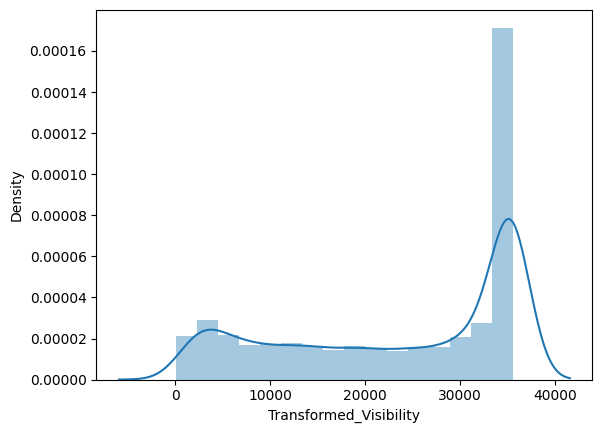

In [57]:
# Calculate the skewness of the 'Visibility' feature
visibility_skewness = data['Transformed_Visibility'].skew()

# Display the skewness value
print(f"Skewness of 'Transformed_Visibility': {visibility_skewness:.2f}")

# Create a distribution plot of 'Visibility'
sns.distplot(data['Transformed_Visibility'])

# Show the plot
plt.show()


In [58]:
data['Transformed_Visibility'].skew()

-0.5208033974294499

In [59]:
# Let's print all column's skewness before applying column transformation.
for col in right_skew_columns:
  print(col,data[col].skew())

Rented_Bike_Count 1.0638389315694605
Wind_speed 0.8909547980299266
Solar_Radiation 1.5040397173602802
Rainfall 14.5332322425467
Snowfall 8.440800781484777


In [60]:
# Let's apply square root column transformation to all right skew column
for column in right_skew_columns:
  data[column]=np.sqrt(num_dat[column])

In [61]:
data['Snowfall'].skew()

5.31480696909106

In [62]:
# Let's print all column's skewness after applying column transformation.
for col in right_skew_columns:
  print(col,data[col].skew())

Rented_Bike_Count 0.237362090985412
Wind_speed -0.005368836345296517
Solar_Radiation 0.8075034623392892
Rainfall 6.6351459550336935
Snowfall 5.31480696909106


In [63]:
# !pip install sweetviz


In [64]:
# import pandas as pd

# import sweetviz as sv

# Load your data
# data = pd.read_csv('your_data.csv')

# Generate the Sweetviz report
# report = sv.analyze(data)

# Visualize the report
# report.show_html()


#Multicollinearity

In [65]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [66]:
# Let's calculate the variance inflation factor (VIF) for all of the variables in the data DataFrame, except for the Rented_Bike_Count variable.
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Hour,5.025734
1,Temperature,193.762900
2,Humidity,202.272224
3,Wind_speed,13.830726
4,Visibility,954.712912
5,Dew_point_temperature,131.446008
6,Solar_Radiation,3.365193
7,Rainfall,1.352006
8,Snowfall,1.197593
9,date_year,512.291147


In [67]:
# Let's drop Dew point temperature feature because it can create problem and it is also highly correlated with Temperature
data.drop(['Dew_point_temperature'],axis=1, inplace=True)

In [68]:
data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning_Day', 'date_year', 'date_months',
       'date_day', 'weekdays_weekend', 'Temperature_Bins',
       'sqr_Rented_Bike_Count', 'Transformed_Visibility'],
      dtype='object')

<Axes: ylabel='Density'>

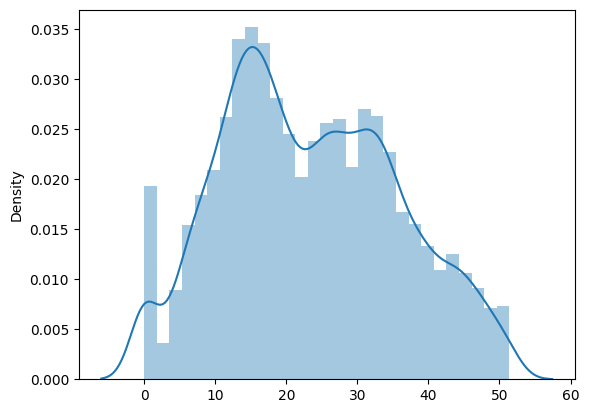

In [69]:
sns.distplot(x=data['sqr_Rented_Bike_Count'])

In [70]:
data.sample(10)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,date_year,date_months,date_day,weekdays_weekend,Temperature_Bins,sqr_Rented_Bike_Count,Transformed_Visibility
2233,2018-04-03,10.862780,1,8.3,91,0.316228,282,0.000000,0.000000,0.0,Spring,No Holiday,Yes,2018,4,Tuesday,1,"(0, 10]",10.862780,2189.626462
7016,2018-09-19,0.000000,8,19.8,71,1.048809,1534,0.509902,0.000000,0.0,Autumn,No Holiday,No,2018,9,Wednesday,1,"(10, 20]",0.000000,24382.944907
3895,2018-12-05,6.557439,7,13.3,81,1.224745,525,0.200000,0.316228,0.0,Spring,No Holiday,Yes,2018,12,Wednesday,1,"(10, 20]",6.557439,5298.182657
6965,2018-09-17,15.684387,5,19.4,84,1.264911,1252,0.000000,0.000000,0.0,Autumn,No Holiday,Yes,2018,9,Monday,1,"(10, 20]",15.684387,18257.281204
7676,2018-10-16,39.597980,20,14.8,68,1.414214,1502,0.000000,0.000000,0.0,Autumn,No Holiday,Yes,2018,10,Tuesday,1,"(10, 20]",39.597980,23661.682958
5470,2018-07-16,43.977267,22,27.2,69,1.303840,2000,0.000000,0.000000,0.0,Summer,No Holiday,Yes,2018,7,Monday,1,"(20, 30]",43.977267,35578.782659
6403,2018-08-24,30.789609,19,23.6,86,1.732051,1275,0.200000,0.000000,0.0,Summer,No Holiday,Yes,2018,8,Friday,1,"(20, 30]",30.789609,18736.799553
3131,2018-10-04,28.965497,11,18.5,27,1.140175,1610,1.609348,0.000000,0.0,Spring,No Holiday,Yes,2018,10,Thursday,1,"(10, 20]",28.965497,26121.544840
8716,2018-11-29,10.344080,4,2.1,33,0.707107,1981,0.000000,0.000000,0.0,Autumn,No Holiday,Yes,2018,11,Thursday,1,"(0, 10]",10.344080,35098.256839
3261,2018-04-15,21.540659,21,9.6,66,1.303840,1850,0.000000,0.000000,0.0,Spring,No Holiday,Yes,2018,4,Sunday,0,"(0, 10]",21.540659,31838.954332


In [71]:
data[data['Functioning_Day']=='No'].head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,date_year,date_months,date_day,weekdays_weekend,Temperature_Bins,sqr_Rented_Bike_Count,Transformed_Visibility
3144,2018-11-04,0.0,0,14.4,82,2.144761,1041,0.0,0.0,0.0,Spring,No Holiday,No,2018,11,Sunday,0,"(10, 20]",0.0,14037.591611
3145,2018-11-04,0.0,1,13.6,81,1.897367,886,0.0,0.0,0.0,Spring,No Holiday,No,2018,11,Sunday,0,"(10, 20]",0.0,11158.336361
3146,2018-11-04,0.0,2,12.7,80,1.974842,885,0.0,0.0,0.0,Spring,No Holiday,No,2018,11,Sunday,0,"(10, 20]",0.0,11140.410135
3147,2018-11-04,0.0,3,11.6,81,1.760682,687,0.0,0.0,0.0,Spring,No Holiday,No,2018,11,Sunday,0,"(10, 20]",0.0,7768.420880
3148,2018-11-04,0.0,4,10.2,83,1.870829,554,0.0,0.0,0.0,Spring,No Holiday,No,2018,11,Sunday,0,"(10, 20]",0.0,5719.390017


In [72]:
data['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [73]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    8760 non-null   datetime64[ns]
 1   Rented_Bike_Count       8760 non-null   float64       
 2   Hour                    8760 non-null   int64         
 3   Temperature             8760 non-null   float64       
 4   Humidity                8760 non-null   int64         
 5   Wind_speed              8760 non-null   float64       
 6   Visibility              8760 non-null   int64         
 7   Solar_Radiation         8760 non-null   float64       
 8   Rainfall                8760 non-null   float64       
 9   Snowfall                8760 non-null   float64       
 10  Seasons                 8760 non-null   object        
 11  Holiday                 8760 non-null   object        
 12  Functioning_Day         8760 non-null   object  

In [74]:
data.drop(['Date','Rented_Bike_Count','Visibility','Temperature_Bins'],axis=1 , inplace=True)

# ***Modeling start***

In [75]:
#Assign all catagoriacla features to a variable
categorical_features=list(data.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Seasons', 'Holiday', 'Functioning_Day', 'date_day'], dtype='object')

In [76]:
data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [77]:
data.head()

,Hour,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,date_year,date_months,date_day,weekdays_weekend,sqr_Rented_Bike_Count,Transformed_Visibility
0,0,-5.2,37,1.483240,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,1,15.937377,35578.782659
1,1,-5.5,38,0.894427,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,1,14.282857,35578.782659
2,2,-6.0,39,1.000000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,1,13.152946,35578.782659
3,3,-6.2,40,0.948683,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,1,10.344080,35578.782659
4,4,-6.0,36,1.516575,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,1,8.831761,35578.782659


In [78]:
# Apply one-hot encoding on categorical features
data = pd.get_dummies(data, columns=['Seasons', 'Holiday', 'Functioning_Day','date_day'])



In [79]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,8760.0,11.500000,6.922582,0.000000,5.750000,11.500000,17.250000,23.000000
Temperature,8760.0,12.882922,11.944825,-17.800000,3.500000,13.700000,22.500000,39.400000
Humidity,8760.0,58.226256,20.362413,0.000000,42.000000,57.000000,74.000000,98.000000
Wind_speed,8760.0,1.249599,0.404264,0.000000,0.948683,1.224745,1.516575,2.720294
Solar_Radiation,8760.0,0.478866,0.582955,0.000000,0.000000,0.100000,0.964365,1.876166
Rainfall,8760.0,0.077869,0.377677,0.000000,0.000000,0.000000,0.000000,5.916080
Snowfall,8760.0,0.056576,0.268097,0.000000,0.000000,0.000000,0.000000,2.966479
date_year,8760.0,2017.915068,0.278796,2017.000000,2018.000000,2018.000000,2018.000000,2018.000000
date_months,8760.0,6.526027,3.448048,1.000000,4.000000,7.000000,10.000000,12.000000
weekdays_weekend,8760.0,0.709589,0.453978,0.000000,0.000000,1.000000,1.000000,1.000000


# **LINEAR REGRESSION**



In [80]:


# Split the data into training and testing datasets
X = data.drop('sqr_Rented_Bike_Count', axis=1)  # Replace 'target_variable' with the name of your target column
y = data['sqr_Rented_Bike_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the machine learning model
model = LinearRegression()  # Replace with your desired algorithm
model.fit(X_train, y_train)

# Make predictions on training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracy scores
train_accuracy_m = mean_squared_error(y_train, train_predictions)
test_accuracy_m = mean_squared_error(y_test, test_predictions)

# Calculate accuracy scores
train_accuracy_r = r2_score(y_train, train_predictions)
test_accuracy_r = r2_score(y_test, test_predictions)

print("Training Accuracy mean squared error:", train_accuracy_m)
print("Testing Accuracy mean squared error:", test_accuracy_m)

print("Training Accuracy r2 score :", train_accuracy_r)
print("Testing Accuracy r2 score :", test_accuracy_r)

Training Accuracy mean squared error: 48.817099160948786
Testing Accuracy mean squared error: 51.03496925034765
Training Accuracy r2 score : 0.6825034874046333
Testing Accuracy r2 score : 0.66501796724815


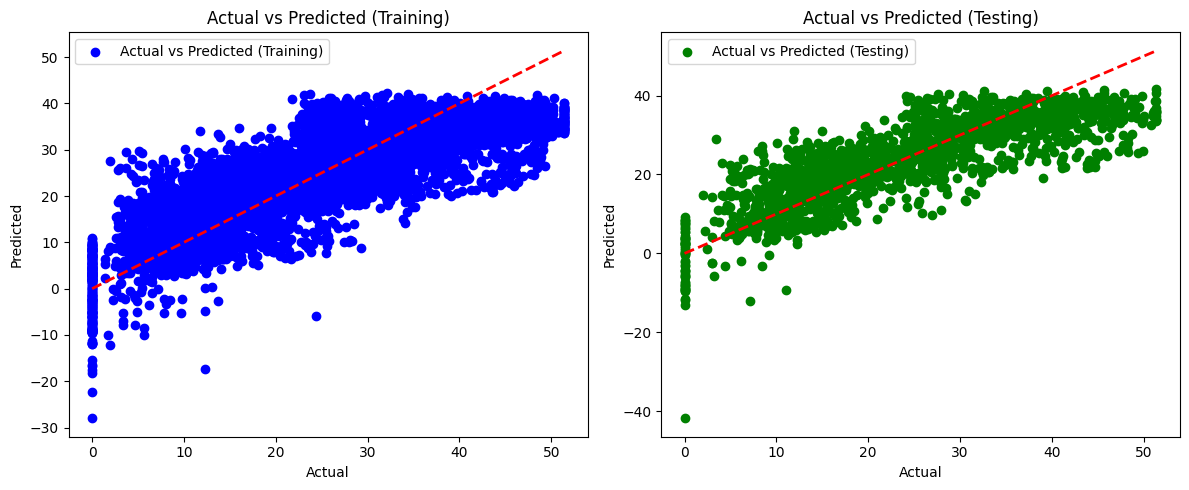

In [81]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the actual values vs predicted values for training data
axs[0].scatter(y_train, train_predictions, color='blue', label='Actual vs Predicted (Training)')
axs[0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Actual vs Predicted (Training)')
axs[0].legend()

# Plotting the actual values vs predicted values for testing data
axs[1].scatter(y_test, test_predictions, color='green', label='Actual vs Predicted (Testing)')
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Actual vs Predicted (Testing)')
axs[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots side by side
plt.show()


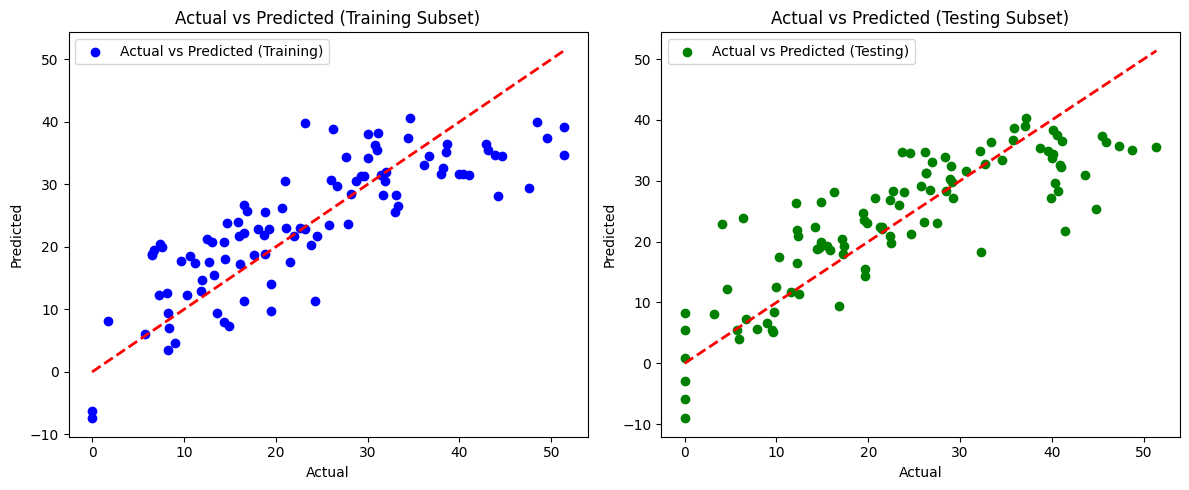

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert y_train and y_test to Pandas Series if they are NumPy arrays
if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train)
if isinstance(y_test, np.ndarray):
    y_test = pd.Series(y_test)

# Select a subset of data
subset_size = 100  # Specify the desired subset size
random_indices = np.random.choice(range(len(y_train)), size=subset_size, replace=False)
y_train_subset = y_train.iloc[random_indices]
train_predictions_subset = train_predictions[random_indices]

random_indices = np.random.choice(range(len(y_test)), size=subset_size, replace=False)
y_test_subset = y_test.iloc[random_indices]
test_predictions_subset = test_predictions[random_indices]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the actual values vs predicted values for training data subset
axs[0].scatter(y_train_subset, train_predictions_subset, color='blue', label='Actual vs Predicted (Training)')
axs[0].plot([min(y_train_subset), max(y_train_subset)], [min(y_train_subset), max(y_train_subset)], color='red', linestyle='--', linewidth=2)
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Actual vs Predicted (Training Subset)')
axs[0].legend()

# Plotting the actual values vs predicted values for testing data subset
axs[1].scatter(y_test_subset, test_predictions_subset, color='green', label='Actual vs Predicted (Testing)')
axs[1].plot([min(y_test_subset), max(y_test_subset)], [min(y_test_subset), max(y_test_subset)], color='red', linestyle='--', linewidth=2)
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Actual vs Predicted (Testing Subset)')
axs[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots side by side
plt.show()


In [122]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a figure with two subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual vs Predicted (Training Subset)", "Actual vs Predicted (Testing Subset)"))

# Plotting the actual values vs predicted values for training data subset
fig.add_trace(go.Scatter(x=y_train_subset, y=train_predictions_subset, mode='markers', name='Actual vs Predicted (Training)', marker=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=[min(y_train_subset), max(y_train_subset)], y=[min(y_train_subset), max(y_train_subset)], mode='lines', name='Ideal', line=dict(color='red', dash='dash')), row=1, col=1)

# Plotting the actual values vs predicted values for testing data subset
fig.add_trace(go.Scatter(x=y_test_subset, y=test_predictions_subset, mode='markers', name='Actual vs Predicted (Testing)', marker=dict(color='green')), row=1, col=2)
fig.add_trace(go.Scatter(x=[min(y_test_subset), max(y_test_subset)], y=[min(y_test_subset), max(y_test_subset)], mode='lines', name='Ideal', line=dict(color='red', dash='dash')), row=1, col=2)

# Set the x-axis and y-axis labels for each subplot
fig.update_xaxes(title_text="Actual", row=1, col=1)
fig.update_yaxes(title_text="Predicted", row=1, col=1)
fig.update_xaxes(title_text="Actual", row=1, col=2)
fig.update_yaxes(title_text="Predicted", row=1, col=2)

# Set the figure title and adjust the spacing between subplots
fig.update_layout(title="Actual vs Predicted", showlegend=True, legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01), height=700, width=1400)

# Show the figure
fig.show()


In [83]:
X.head()

,Hour,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall,Snowfall,date_year,date_months,weekdays_weekend,...,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes,date_day_Friday,date_day_Monday,date_day_Saturday,date_day_Sunday,date_day_Thursday,date_day_Tuesday,date_day_Wednesday
0,0,-5.2,37,1.483240,0.0,0.0,0.0,2017,1,1,...,1,0,1,0,0,0,0,1,0,0
1,1,-5.5,38,0.894427,0.0,0.0,0.0,2017,1,1,...,1,0,1,0,0,0,0,1,0,0
2,2,-6.0,39,1.000000,0.0,0.0,0.0,2017,1,1,...,1,0,1,0,0,0,0,1,0,0
3,3,-6.2,40,0.948683,0.0,0.0,0.0,2017,1,1,...,1,0,1,0,0,0,0,1,0,0
4,4,-6.0,36,1.516575,0.0,0.0,0.0,2017,1,1,...,1,0,1,0,0,0,0,1,0,0


In [84]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: sqr_Rented_Bike_Count, dtype: float64

In [85]:
print(X.shape)
print(y.shape)


(8760, 26)
(8760,)


In [86]:
X_train = np.resize(X_train, (len(y_train),))
X_train.size

7008

In [87]:

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# Use the original target variable for y_actual
y_actual = y


In [88]:
residuals = y_actual - y_pred


In [89]:
# Let's find mean of our residuals
mean_residuals = np.mean(residuals)
mean_residuals

4.3304821930306893e-13

#**LASSO REGRESSION** 

In [90]:
from sklearn.preprocessing import StandardScaler 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Lasso model
lasso = Lasso(alpha=0.01)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.672162374350083 0.6812267422907134


In [91]:
data.sample(5)

,Hour,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall,Snowfall,date_year,date_months,weekdays_weekend,...,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes,date_day_Friday,date_day_Monday,date_day_Saturday,date_day_Sunday,date_day_Thursday,date_day_Tuesday,date_day_Wednesday
2009,17,4.6,52,1.974842,0.707107,0.000000,0.000000,2018,2,1,...,1,0,1,0,0,0,0,1,0,0
2027,11,3.8,72,0.948683,1.048809,0.000000,1.843909,2018,2,1,...,1,0,1,1,0,0,0,0,0,0
2718,6,4.2,50,0.774597,0.000000,0.000000,0.000000,2018,3,0,...,1,0,1,0,0,1,0,0,0,0
1194,18,2.9,45,1.264911,0.200000,0.000000,0.000000,2018,1,1,...,1,0,1,1,0,0,0,0,0,0
6524,20,23.4,98,0.774597,0.000000,4.582576,0.000000,2018,8,1,...,1,0,1,0,0,0,0,0,0,1


In [92]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [93]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 48.850081074937236
RMSE : 6.989283301951441
MAE : 5.405971427844121
R2 : 0.6812267422907134
Adjusted R2 : 0.6773949786751603


**Looks like our r2 score value is 0.67 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

# **RIDGE REGRESSION**


In [94]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Assuming you have your data in X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.6650218400588513


# **ELASTIC NET REGRESSION**

In [95]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Assuming you have your data in X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Elastic Net model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.8)
elastic_net.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = elastic_net.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.6177177096487386


# **DECISION TREE**

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have your data in X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree regressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = tree.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 22.859006934837403


# **RANDOM FOREST**

In [97]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [98]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


In [99]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9893112119110826
MSE : 1.6434688487808666
RMSE : 1.281978489983692
MAE : 0.8264227973412579
R2 : 0.9893112119110826
Adjusted R2 : 0.9891501055398874


In [100]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [101]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [102]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [103]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [104]:
import plotly.graph_objects as go

# Define the figure layout
fig = go.Figure()

# Create the horizontal bar chart
fig.add_trace(go.Bar(
    y=[features[i] for i in indices],
    x=importances[indices],
    orientation='h',
    marker=dict(color='yellow')
))

# Set the title and axis labels
fig.update_layout(
    title='Feature Importance',
    xaxis_title='Relative Importance',
    yaxis_title=None
)

# Show the figure
fig.show()


#**Hyperparameter tuning** 

In [105]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

### **Importing Gradient Boosting Regressor**

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the Random Forest regressor with the given hyperparameters
rf_regressor = RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100)

# Train the regressor using your training data
rf_regressor.fit(X_train, y_train)

# Make predictions on new data
predictions = rf_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)


Mean Squared Error: 23.525638744336533


In [107]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.4s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [108]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [109]:
gb_optimal_model = gb_grid.best_estimator_

In [110]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [111]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [112]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9590586114780894
MSE : 6.294997721150429
RMSE : 2.5089834039208845
MAE : 1.6888410290950413
R2 : 0.9590586114780894
Adjusted R2 : 0.9584415238829765


In [113]:

# Create an instance of the LinearRegression model
model = GradientBoostingRegressor()

# Fit the model to the data
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# Use the original target variable for y_actual
y_actual = y

residuals = y_actual - y_pred

# Let's find mean of our residuals
mean_residuals = np.mean(residuals)
mean_residuals

-1.6287326637058004e-15